In [2]:
import json
import pandas as pd
import json
from sklearn.pipeline import FeatureUnion
from sklearn_pandas import DataFrameMapper
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, sent_tokenize
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# splitting data set into train/test
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from nltk.stem import WordNetLemmatizer 

In [3]:
json_file=r"C:\Users\Lora\Desktop\TxMM\Project\news-category-dataset\News_Category_Dataset_v2.json"

## investigate data 
data = []
for line in open(json_file,'r'):
    data.append(json.loads(line))
    
# Creates DataFrame. 
df_headline = pd.DataFrame(data) 
df_short_desc = pd.DataFrame(data)

# Dropping unnecessary categories from both data frames
df_headline = df_headline.drop(['date','authors','link','short_description'], axis=1)
df_short_desc = df_short_desc.drop(['date','authors','link','headline'], axis=1)

# Grouping similar categories in data frame for headline 
df_headline.loc[df_headline['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
df_headline.loc[df_headline['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS'
df_headline.loc[df_headline['category'] == 'ARTS & CULTURE', 'category'] = 'ARTS'
df_headline.loc[df_headline['category'] == 'THE WORLDPOST', 'category'] = 'WORLDPOST'
df_headline.loc[df_headline['category'] == 'WORLD NEWS', 'category'] = 'WORLDPOST'
df_headline.loc[df_headline['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
df_headline.loc[df_headline['category'] == 'PARENTING', 'category'] = 'PARENTS'
df_headline.loc[df_headline['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'


# Dropping categories with two little samples for headline 
df_headline=df_headline.drop(df_headline[df_headline.category == 'FIFTY'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'GOOD NEWS'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'LATINO VOICES'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'MONEY'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'WEIRD NEWS'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'TASTE'].index)
df_headline=df_headline.drop(df_headline[df_headline.category == 'TECH'].index)

# Grouping similar categories in data frame for short desc 
df_short_desc.loc[df_short_desc['category'] == 'COLLEGE', 'category'] = 'EDUCATION'
df_short_desc.loc[df_short_desc['category'] == 'CULTURE & ARTS', 'category'] = 'ARTS'
df_short_desc.loc[df_short_desc['category'] == 'ARTS & CULTURE', 'category'] = 'ARTS'
df_short_desc.loc[df_short_desc['category'] == 'THE WORLDPOST', 'category'] = 'WORLDPOST'
df_short_desc.loc[df_short_desc['category'] == 'WORLD NEWS', 'category'] = 'WORLDPOST'
df_short_desc.loc[df_short_desc['category'] == 'GREEN', 'category'] = 'ENVIRONMENT'
df_short_desc.loc[df_short_desc['category'] == 'PARENTING', 'category'] = 'PARENTS'
df_short_desc.loc[df_short_desc['category'] == 'STYLE & BEAUTY', 'category'] = 'STYLE'

# Dropping categories with two little samples for short desc  
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'FIFTY'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'GOOD NEWS'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'LATINO VOICES'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'MONEY'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'WEIRD NEWS'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'TASTE'].index)
df_short_desc=df_short_desc.drop(df_short_desc[df_short_desc.category == 'TECH'].index)

# reseting index for both tables
df_headline=df_headline.reset_index(drop=True)
df_short_desc=df_short_desc.reset_index(drop=True)

# checking categories
df_headline.groupby('category').count()
df_short_desc.groupby('category').count()


,short_description
category,
ARTS,3878
BLACK VOICES,4528
BUSINESS,5937
COMEDY,5175
CRIME,3405
DIVORCE,3426
EDUCATION,2148
ENTERTAINMENT,16058
ENVIRONMENT,3945


In [4]:
import string

#cleaning headlines and short descriptions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

import re 
# removing numbers from string   
def remove(tt): 
    pattern = '[0-9]'
    a = re.sub(pattern, '',tt) 
    return a

def remove_stopwords(text):
    help_list=[]
    stop_words = set(stopwords.words('english'))
    for item in text.split(' '):
        if item not in stop_words:
            help_list.append(item)
    a = ' '.join(help_list)
    return a


def lemm(str):
    x=str.split(' ')
    r=[]
    for word in x: 
        r.append(lemmatizer.lemmatize(word))
    return ' '.join(r)



## cleaning headline df
#lower case
df_headline['headline'] = df_headline['headline'].str.lower()
# removing punct 
df_headline['headline'] = df_headline['headline'].apply(remove_punctuations)
# removing numbers
df_headline['headline'] = df_headline['headline'].apply(remove)
# lemmatization
df_headline['headline'] = df_headline['headline'].apply(lemm)
# removing stop words performed automatically 

## cleaning short description df

#lower case
df_short_desc['short_description'] = df_short_desc['short_description'].str.lower()
# removing punct 
df_short_desc['short_description'] = df_short_desc['short_description'].apply(remove_punctuations)
# removing numbers
df_short_desc['short_description'] = df_short_desc['short_description'].apply(remove)
# removing stop words performed automatically 
# removing empty rows where description not available
df_short_desc['short_description'].replace('', np.nan, inplace=True)
df_short_desc.dropna(subset=['short_description'], inplace=True)
df_short_desc = df_short_desc.reset_index(drop=True)
# resulted with 170098 rows × 2 columns
#lemmatization
df_short_desc['short_description'] = df_short_desc['short_description'].apply(lemm)


In [136]:
df_headline = df_headline.head(50000)
df_headline=df_headline.sample(frac=1)
df_headline = df_headline.reset_index(drop=True)

In [5]:
df_short_desc= df_short_desc.head(50000)
df_short_desc = df_short_desc.sample(frac=1)
df_short_desc = df_short_desc.reset_index(drop=True)

In [6]:
# for both

# Associate Category names with numerical index and save it in new column category_id
df_headline['category_id'] = df_headline['category'].factorize()[0]
df_short_desc['category_id'] = df_short_desc['category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
#df_headline['category_id'][0:10]
#df_short_desc['category_id'][0:10]

In [7]:
# for both

# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df_headline = df_headline[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df_shd = df_short_desc[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [8]:
# for both

# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id_headline = dict(category_id_df_headline.values)
id_to_category_headline = dict(category_id_df_headline[['category_id', 'category']].values)

category_to_id_shd = dict(category_id_df_shd.values)
id_to_category_shd = dict(category_id_df_shd[['category_id', 'category']].values)


In [10]:
# headlines
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english',max_features=7000)

features = tfidf.fit_transform(df_short_desc.short_description) # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df_short_desc.category_id                           # represents the category of each of the 1490 articles

In [174]:
# how many features are there
features.shape

(50000, 7000)

In [145]:
labels

0         0
1         1
2         2
3         1
4         3
5         4
6         5
7         6
8         7
9         8
10        9
11       10
12       11
13        1
14       11
15        4
16        3
17        1
18        1
19        1
20        6
21        6
22        1
23        1
24        6
25       12
26       11
27        9
28       13
29        1
         ..
49970     1
49971    12
49972    20
49973     1
49974     9
49975    19
49976    10
49977     1
49978    13
49979     1
49980    13
49981     1
49982     1
49983     9
49984     1
49985     1
49986     8
49987     7
49988     6
49989     9
49990     7
49991     4
49992     1
49993     4
49994     9
49995    14
49996    17
49997     9
49998    11
49999    12
Name: category_id, Length: 50000, dtype: int64

In [11]:
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id_headline.items()):
    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(Category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'ARTS':
  . Most correlated unigrams:
       . brighten
       . succinct
       . woman
  . Most correlated bigrams:
       . twitter fail
       . brilliant succinct
       . wisdom week
# 'BLACK VOICES':
  . Most correlated unigrams:
       . book
       . artist
       . art
  . Most correlated bigrams:
       . harry potter
       . short film
       . new book
# 'BUSINESS':
  . Most correlated unigrams:
       . parent
       . kid
       . mom
  . Most correlated bigrams:
       . way week
       . thing parent
       . mom dad
# 'COMEDY':
  . Most correlated unigrams:
       . shelter
       . nonprofit
       . homeless
  . Most correlated bigrams:
       . ucf forum
       . hurricane irma
       . people just
# 'CRIME':
  . Most correlated unigrams:
       . president
       . republican
       . trump
  . Most correlated bigrams:
       . hillary clinton
       . white house
       . donald trump
# 'DIVORCE':
  . Most correlated unigrams:
       . football
       . footag

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    LinearSVC(C=0.7,multi_class="ovr"),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=1000),
]

CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

for model in models:
    model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

In [13]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()
cv_df


,model_name,fold_idx,accuracy
0,LinearSVC,0,0.5026
1,LinearSVC,1,0.5020
2,LinearSVC,2,0.5057
3,LinearSVC,3,0.5068
4,LinearSVC,4,0.5056
5,MultinomialNB,0,0.4688
6,MultinomialNB,1,0.4671
7,MultinomialNB,2,0.4733
8,MultinomialNB,3,0.4734
9,MultinomialNB,4,0.4712


In [14]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.50454
LogisticRegression    0.50438
MultinomialNB         0.47076
Name: accuracy, dtype: float64

In [153]:
df_headline.index

RangeIndex(start=0, stop=50000, step=1)

Text(0.5, 15.0, 'Predicted')

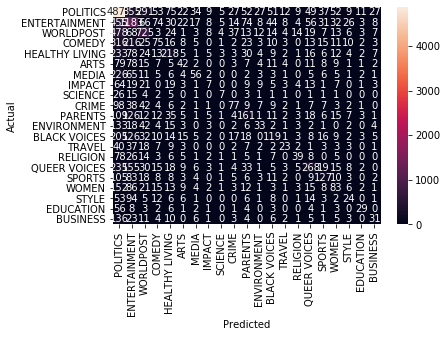

In [23]:
from matplotlib import pyplot as plt
model = LinearSVC(C=0.7,multi_class="ovr")

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_short_desc
                                                                                 .index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
#y_pred_proba = model.predict(X_test)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df_shd.category.values, yticklabels=category_id_df_shd.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [162]:
# Studying failing scenarios
from IPython.display import display

for predicted in category_id_df_headline.category_id:
    for actual in category_id_df_headline.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category_headline[actual], id_to_category_headline[predicted], conf_mat[actual, predicted]))
            display(df_headline.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['headline'])
            print('')

'POLITICS' predicted as 'SCIENCE' : 3 examples.


44915            are u strategist living on another planet
45319                          normalizing a solar eclipse
3865     gop want nasa to stop worrying about earth and...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'SCIENCE' : 6 examples.


10749    levar burton reading goodnight moon to neil de...
41147    how can anyone be antiscience when bill nye an...
38457    gal gadot’s seemingly innocent tribute to step...
39331    milhouse predicted monday nobel prize winner b...
15217       watch blue ivy bid  on art like it no big deal
24865    neil degrasse tyson pick apart the science of ...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'SCIENCE' : 4 examples.


1787     knoxville zoo investigates mysterious death of...
4037     stargazer rejoice u get it first international...
48031    scientist stumped by thousand of dead fish off...
11738    to the surprise of no one nasa predicts  will ...
Name: headline, dtype: object


'WORLDPOST' predicted as 'SCIENCE' : 4 examples.


17490      climate change what do the scientist really say
28404        papua new guinea rattled by strong aftershock
26955    sergei skripals cat guinea pig dead after inve...
30634    newly discovered amelia earhart pic is b milit...
Name: headline, dtype: object


'STYLE' predicted as 'SCIENCE' : 3 examples.


43036           a look back at eminems image over the year
45723    goop deletes yet another strange health claim ...
2222            start the new year right by organizing now
Name: headline, dtype: object


'WOMEN' predicted as 'SCIENCE' : 2 examples.


25854    zero woman win nobel prize during sadly antiwo...
15100    we have liftoff lego set honoring woman of nas...
Name: headline, dtype: object


'SCIENCE' predicted as 'POLITICS' : 8 examples.


32246    hundred of coastal community could face monthl...
33351    bobak ferdosi we are far more similar than dif...
43715    a highly classified spy satellite ha been dest...
25140       a debate on the pro and con of aging and death
13465       the march for science is a march for democracy
37440    dolphin conversation caught on tape for first ...
31245    stephen hawking trump climate policy could tur...
1494     everything you need to know to get ready for t...
Name: headline, dtype: object


'SPORTS' predicted as 'POLITICS' : 62 examples.


7302              yankee retiring derek jeters no  on may 
20051    woman basketball team declined trump white hou...
24664    nevada legislature approves  million tax subsi...
35508    adam rippon will now totally take mike pences ...
35208    report college hoop corruption case poised to ...
4064     anthemprotesting qb colin kaepernick is now at...
29747    lilly king becomes american hero wagging finge...
38084           fbi monitored muhammad ali over muslim tie
8942     atlanta falcon strike gold hiring steve sarkis...
31738    the staple center will soon bust out a huge st...
14931    donovan mitchell us footwear to send powerful ...
16922    famed quarterback warren moon hit with sexual ...
15784                                  nyc fc    dc united
49851    people sent a lot of racist email to ucla afte...
26315    mckayla maroney signed confidentiality agreeme...
13948    diana taurasi becomes wnbas alltime leading sc...
47403    central michigan upset with incredible hail ma.


'ARTS' predicted as 'POLITICS' : 59 examples.


43836    tarot reader describe how their client have ch...
11078                obama’s next chapter write a new book
4263     pussy riot offer advice on how to defy ‘stupid...
14684    merriamwebster step in after trump tell americ...
38276                           norman rockwell hallelujah
3344     the harmonic sorcery of jerry bergonzispotligh...
29769    priestdaddy take on priesthood fatherhood and ...
5029      year after his death architect’s building are...
17555    bizarre photo capture the unreality of the  el...
33065    this new york activist want to replace a statu...
45744    a brief history of america most controversial ...
8056     musician from country affected by trump’s trav...
32256    photo of america quirkiest convention will bri...
10258    donald trump clearly like reading book if they...
31836    obama possible aspiringnovelistinchief once wr...
3411               the sartorial genius of georgia okeeffe
41115    the strippeddown history of underwear from wha.


'QUEER VOICES' predicted as 'POLITICS' : 52 examples.


22468    gay politician call for yuengling beer boycott...
44302    donald trump wa about to make jerry falwell jr...
43416                                        we are still 
28607    betsy devos wont protect lgbt student so we ha...
1990     kentucky governor call kim davis an inspiratio...
46860    candice wiggins say wnba wa toxic to her for b...
25826    cop sue st louis county after allegedly being ...
11406    hillary clinton blast north carolina meanspiri...
26078    yes there actually a straight life matter rall...
6947     here the perfect candidate to replace north ca...
41026    are some democrat going soft on lgbtq right in...
29524    congratulation – and thank you – to these pion...
1597     mike penny claiming he care about the most vul...
23965    illinois gop rep doesnt get why transphobic ad...
8309     these men became house flipper so they could s...
46581    tim kaine keynote human right campaign nationa...
3597     how my uncle military photo inspired my projec.


'MEDIA' predicted as 'POLITICS' : 161 examples.


31902    yearold grill mike penny on whether he is soft...
32490    donald trump is a threat to press freedom unkn...
7187     breitbart news want trump to know his base is ...
49021    journalist lash out a georgia campaign bar med...
11239    ap deems term altright a publicrelations devic...
44644    donald trump hometown newspaper just burned hi...
12782    twitter get into trump conspiracy spirit with ...
49066    ahmed naji  month of detention is  month too many
27738    presidential debate moderator are feeling the ...
32309    rachel maddow it seems clear trump is now unde...
10597    glenn beck call james comeys letter one of the...
39844    tomi lahren blame liberal for tide pod challen...
21337    olbermann is convinced a grand jury is probing...
41253    sunday show shirk climate expert after a fires...
32350    donald trump victory challenge the power of th...
4276     trump will lunch with the enemy ahead of his c...
12883    the trump white house still hasnt made peace w.


'HEALTHY LIVING' predicted as 'POLITICS' : 173 examples.


47765    hurricane harvey public health impact extends ...
27174    the mental toll of repeal how the aca protects...
33110            here are  myth about diversity in science
45482    very few health condition should disqualify yo...
34853     white privilege help explain the opioid epidemic
9773     your office ha a microbiome and it might make ...
4390     why are we questioning opiate replacement medi...
49766     of the absolute worst holiday stressor and ho...
2369     health care cost expected to rise because of n...
38645    tyson chicken recalled over possible hard plas...
35537         quarter of republican want to keep obamacare
7769     expanding the emergency room model central car...
41418         how i afford both avocado toast and my house
20280    what you need to know about medicare before op...
2508     cheap drug may have turned this indian lake in...
366                    fact everyone should know about hpv
35891                     this is your body on dry janua


'COMEDY' predicted as 'POLITICS' : 140 examples.


44605    there wa no audio so we captioned the trump an...
49489                       facebook in real life politics
9873     donald trump tweet are so whiny they got anoth...
41185    wilmer valderrama cover american refugee in me...
20770    commuter barbie listens to npr and ha no time ...
7167     george carlin recorded a joke about mass fatal...
43043    we got the exclusive look at hillary dnc speec...
28643     thing that lasted longer than scaramucci in t...
12346               everything i did while i wa unemployed
20698    smoldering clintonkaine campaign poster stokes...
4833     jordan klepper destroys gop bill that sell goo...
45975    watch all these vine in a row and i promise yo...
8210     this trump protest sign reminds u the resistan...
20504    black friday sale on white house official a yu...
5115     whitehousescentedcandles prove that something ...
9530        deserves this beyond scared straight treatment
25054    father of trump tower climber also ha an impor.


'EDUCATION' predicted as 'POLITICS' : 56 examples.


42025    democracy requires citizenship education now m...
49986    huffpost welcome honorary take your child to w...
25697    devos should stop stalling enforce obama rule ...
35477    what did we learn from the betsy devos confirm...
44126    what it mean when a school district declares i...
43106    betsy devos government suck and we don’t fire ...
36792    betsy devos and public school visit a brief guide
14441    school stand up for trans student a gop withdr...
34302    teacher swarm kentucky capitol to protest pens...
24837    partisan divide about college reflects our dis...
11121                          devoss disqualifying record
49186         arizona teacher are abandoning ship here why
7353     we can’t wait solution to k sexual harassment ...
64       housing crisis in california force more studen...
9026     norm pattiz accused of sexual harassment to re...
22094    if state takeover of new orleans school worked...
27247    pa charter management ceo not publicly account.


'ENTERTAINMENT' predicted as 'POLITICS' : 173 examples.


15055    mila kunis expertly troll mike penny every sin...
22320    emilia clarke should never try to imitate chew...
27739    jon voight claim lincoln is smiling knowing am...
21015    ilana glazer ha no problem firing men for sexu...
36811    boyd tinsley to hate group in charlottesville ...
37787    ally sheedy know you still think of her a an s...
8157     ricky gervais stand up for truth in the age of...
31291    wyclef jean troll donald trump in if i wa pres...
7813     george hw bush resurfaces to toss out super bo...
24574    doe the party in power determine the monster i...
28088    assassination of gianni versace is the best ry...
20513    how e tried and failed to bring the metoo move...
12656     year ago to the day doctor who predicted alte...
43826    donald trump may actually enjoy jim carreys la...
36344    rightwing conspiracy theory about alabama elec...
11740    rosie odonnell tweet up an antitrump storm dur...
7283     ozzy osbourne say separation from sharon wa ju.


'ENVIRONMENT' predicted as 'POLITICS' : 103 examples.


48520    trump administration move to weaken offshore s...
19278    here what we know about the florida key after ...
4135     in massachusetts protester balk at pipeline co...
40349    phoenix az a blue city in a red state is going...
10627    drone are bugging seal pupping on a california...
35674    u take strong stand against rhino poaching wit...
21200    dakota access pipeline protest sweep across co...
42057    regenerative appalachia storytelling and song ...
38517    california get federal emergency declaration f...
17536    check out all these doggos enjoying the bomb c...
47435    to presidentelect trump let not handoff the us...
48889                             bar war climate in court
14740    dear president obama you must do this bold cli...
11792    major grassroots victory last coal export term...
31735    texan ride out the fury of the storm inside a ...
35464    what if trump and xi were to see eye to eye on...
6347     jerry brown asks donald trump for california s.


'WORLDPOST' predicted as 'POLITICS' : 271 examples.


26750                         news roundup for september  
42944    exit poll show uk conservative set to lose maj...
12186    british defense secretary michael fallon resig...
48059               cyber attack cripple company worldwide
7107           the real economic cost of accepting refugee
15843    governor gone wild mexico face a lost generati...
46725    uruguay first country in the world to legally ...
24492    in russia state tv and the internet tell a tal...
7064     trump apprenticeship program should help train...
23399    jewish advocate slam putin for implicating jew...
11815                              what next for kurdistan
16706    record number of venezuelan seek asylum in the...
2307      way in  day here how trump ha threatened huma...
28634       photo show the calais jungle going up in flame
47220    there almost no chance of meeting paris climat...
46742    major power warn trump over middle east peace ...
3335     defeating terrorism requires recognition of we.


'PARENTS' predicted as 'POLITICS' : 42 examples.


26331    bus driver build student with wheelchair a ram...
44542                     growing up isnt a bad a it seems
42573    what i want to be able to tell my child about ...
46398    school celebrates crossing guard who served sa...
37503                    mothering mistake make u stronger
41577    the number of baby named barack is back on the...
25533               tale of anaphylaxis from the spin bike
28813    how to talk with child about la vega in a way ...
23822                                    our american life
28930    tip for keeping grandparenting the great gig t...
9362         will i ever share my bed with a partner again
8928                              down syndrome a disaster
14350    parent create teachable moment at immigration ...
44099    liar liar pant on fire making kid say sorry wh...
4672     bighearted iowa principal get head shaved to b...
15291    to my meanttobes a letter to my failed ivf embryo
7875                 let demand equal right for father d


'BUSINESS' predicted as 'POLITICS' : 120 examples.


39118    exxon adviser resigns over oil giant targeted ...
41603        layoff near at carrier factory saved by trump
26940    the sec just made the case for divesting from ...
17083    trump threatens bmw with border tax on car bui...
1877     restricting immigration won’t make american in...
6269              why janitor get noncompete agreement too
28       for consumer problem sometimes the best advoca...
10702    rat in the cellar the american food industry s...
33183         winning ticket in  million powerball lottery
985      well fargo account scandal prompt criminal inv...
41395     freelance job anyone can do to make money on ...
28418                             airbnb sue new york city
29555    put your money where your mouth is vote with y...
21152    elon musk tesla spacex join company opposing d...
3481                         bitcoins big ethereum problem
8834     usda spare poultry worker faster line speed bu...
18612    trump’s usda could make hog workers’ job even .


'BLACK VOICES' predicted as 'POLITICS' : 139 examples.


34315            an open letter to the united state senate
38037    judge dismisses discrimination lawsuit filed b...
45415    hundred remember the life of terence crutcher ...
787      the time trump slammed blackish for being a ra...
9052     maxine water isnt running for anything except ...
16090    jesse williams say voter fraud is a myth it bu...
27650    cal poly president say frat member in blackfac...
4964     florida teacher keep job after telling student...
8471     chance the rapper clarifies that he doe not su...
39370    republican are your friend who borrows money t...
22688             to kneel or stand a prisoner perspective
14954    here jackie robinson letter to orphan boy who ...
20159    jackie robinson day is april   here a story ab...
11609    muhammad ali son launched a religious justice ...
39222    naacp president call on donald trump to apolog...
15478    kareem abduljabbar what it mean to be black du...
48250    tribe prepares to keep up pipeline protest thr.


'CRIME' predicted as 'POLITICS' : 68 examples.


19883    suspect in murder of student blaze bernstein c...
21388    arkansas plan to execute  convicted killer on ...
47529     great dane rescued in new hampshire in worst ...
25744    hacker blamed for setting off  dallas emergenc...
12530    man’s attempt at using google to rob a bank ba...
24047    prisoner take down fellow inmate during viciou...
18318                       alabama executes torrey mcnabb
37666      fbi reportedly investigating clinton foundation
36404    what we know and dont know about stephen paddo...
10698     white supremacist in texas indicted in meth k...
46496    hostage taker reportedly blame trump for priso...
37318    cosbys legal team secures imported jury blame ...
43820    texas halt execution of nontriggerman over que...
30802    alert florida student may have stopped a mass ...
4408     nc governor declares state of emergency amid v...
34799    driver detained at white house after alleged c...
35248    u polygamist busted in mexico following death .


'IMPACT' predicted as 'POLITICS' : 56 examples.


17447    chicago resident get to decide how city fund a...
33740     breaking the cycle of generational incarceration
19923                                             antilent
3689     summertime when the livin’ is hard for hungry ...
12004    refugee use scrap to build house that remind t...
17321    the choice bus us prisoner perspective to disc...
15692      why we cant give in to fear in the age of trump
47093    veteran are fighting antiimmigrant hate with n...
4119     navigating welfare reform poverty is tricky bu...
38248            tweet that show love can be a radical act
2495      moving beyond trump — rebuilding our civiliza...
45280    our compassion is being challenged a west virg...
11803     visionary idea hatched in the middle of the j...
46592    social anxiety doesn’t get the attention it de...
21207        uniting generation to make community stronger
8682     eastern kentucky struggle with water symbolize...
683      how welfare work requirement can deepen and pr.


'STYLE' predicted as 'POLITICS' : 35 examples.


16223     diesel troll trump border wall with new campaign
49899    nordstrom copresident business impact of trump...
20234    the most talkedabout suit at the espys sure wa...
14961    a jewelry brand just threw the best shade at i...
13140    miss north dakota cara mund is crowned state f...
16710    why i canceled my order from ll bean the toxic...
26033    all the rnc swag that will probably end up in ...
27474    self magazine end it print run on a bodypositi...
26209    become a member of the trump family with these...
46672    twitter wa distracted by trump super long neck...
5348        resistance purchase that also support the aclu
24385                thing that always go on sale in april
826      student dress code violation cleavage and exce...
23053    malia obama arrived at harvard and oh man kid ...
32755    this petition for macys to drop ivanka trump i...
12068    huffpost did an office clothing swap and you c...
2903     here are national lipstick day deal that dont .


'WOMEN' predicted as 'POLITICS' : 146 examples.


24457    how deceptive crisis pregnancy center undermin...
30995    watch yearold sophie cruz give one of the best...
48840    yale drop white supremacist name from college ...
14587                                         whywemarched
6755     antiabortion governor ironically tweet about t...
24008    read the empowering letter michelle obama sent...
4326      driving while white reflection on bias and right
32438    are you a gamer who the victim of a harassment...
46142    trump is deeply sexist but misogyny is not a r...
26454    elizabeth warren might get her very own action...
38141       trump is our presidentelect it time for action
29313    meet the planned parenthood organizer who lobb...
37626                      and the wall came tumbling down
379      thousand of woman plan to strike during inaugu...
11006    the hyde amendment continues to punish our cou...
40396    donald trump could learn a lot from reebok’s v...
24782    please someone make donald trump stop talking .


'RELIGION' predicted as 'POLITICS' : 78 examples.


9527                                     our great god gun
36406    attention politician god created and welcome u...
44722                 sorry mr trump this is not about you
47423        trump should not encourage politics in church
49846    christian twitter is calling out the hypocrisy...
30033    more than brick and mortar and country club house
13980    tech employee promise never to help trump buil...
36009    saudi arabia take extra precaution for hajj a ...
37799    campaign raise thousand to support family of m...
39475                                remembering a prophet
47972    montana synagogue request police protection af...
14105    how this former extremist embraced the real me...
45651                            are you too materialistic
23819    evangelical pastor reveals why he quit trump a...
25324    donald trump proposed muslim ban ha not aged w...
8867     america need an antisemitism monitor at the st...
11777              i say allahu akbar i am not a terrori


'TRAVEL' predicted as 'POLITICS' : 30 examples.


22159     secret weapon we use to score cheap plane ticket
4567     get out of my store what to do when youre deni...
27232                    the best way to use leftover rice
9197     introvert listen up this private cabin is how ...
17833    the surprising reason the fcc chairman doesnt ...
24770    odessa texas boast resource often associated w...
21995    the last of manhattan gilded age mansion is on...
23742    here what hawaiian airline is doing to help fi...
8207     what happened when i went on a staycation with...
695       trip to take from new york city on a long wee...
49909     way to catch the solar eclipse if you havent ...
9846     los angeles v san francisco which city rule th...
29801    pippa middleton is honeymooning on barack obam...
25134                                  u city to watch in 
44926    how arrestor bed stopped mike pences plane fro...
42992                       the case for taking a gap year
29268    emirate airline cut flight due to trump travel.


'SCIENCE' predicted as 'SPORTS' : 2 examples.


35768    world atmospheric co spiked to a record last y...
41179               why a giant green lake turned bloodred
Name: headline, dtype: object


'POLITICS' predicted as 'SPORTS' : 17 examples.


48243    oppose the nfl protest you probably also would...
5689     the history of the united state look so cool i...
28478    turkish nba player detained in romania say his...
18322    patriot owner hope trump will retrieve super b...
25538    monday morning email tom brady delivers super ...
43111        airbnb just suffered a major loss in new york
35296    the military banned waterboarding trainee beca...
47569    some nfl player continue anthem protest despit...
15193    humayun khan army comrade remember him a a sel...
45918    lebron james tweet brutal response to trump st...
38234    donald trump jr attack olympian adam rippon on...
12923    ivanka trump face backlash over olympic closin...
25427    obama cub world series win is the greatest thi...
40635    hedge fund bet bilked kentuckian out of their ...
11748    there’s a reason powerful american love to att...
34751         how state are gambling on sport betting case
25244    spur coach gregg popovich rip game show preside


'ARTS' predicted as 'SPORTS' : 2 examples.


14641    simone bile is a superhero in this perfect oly...
24823    incredibly detailed timelapse video show the f...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'SPORTS' : 5 examples.


27880    nhl athlete offer the worst nonapology for a s...
42849    the first u boxer to fight a a woman and then ...
20809       are microaggressions on the rise in pittsburgh
41936    university cheerleader find solace in sport af...
22611    not just a victim nba legend’s son provides ne...
Name: headline, dtype: object


'MEDIA' predicted as 'SPORTS' : 2 examples.


32448    katie couric is skating on thin ice with dutch...
47245    why i call on time magazine to name kaepernick...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'SPORTS' : 8 examples.


47415         the science behind michael phelps’ game face
41943    young football player brain change after one s...
5692                      three tip for your best marathon
30721    this pic prof simone bile is a mere mortal aft...
40011    is michael phelps and ryan lochte’s rivalry a ...
27075    concussion in youth sport separating fact from...
25734               my olympic journey sick in south korea
19668                         the olympic hangover is real
Name: headline, dtype: object


'COMEDY' predicted as 'SPORTS' : 12 examples.


9896      year ago bill murray called a full cub game a...
16391    the new ‘amazon nick lachey’ translates sport ...
37652    bad lip reading of trashtalkers floyd mayweath...
18678    here evidence floyd mayweather and conor mcgre...
47754    the opposition make a few change to proposed m...
35434    nick jonas want to find forever home for these...
11264    so ron burgundy and anchorman pal watched cub ...
24264    this is the consequence of overinflated footba...
6137     if you must run out onto the ice during hockey...
13054    jimmy kimmels skating or sneezing game should ...
21854    usain bolt run ring around james corden in oly...
9090     your sunday is open again because these puppy ...
Name: headline, dtype: object


'EDUCATION' predicted as 'SPORTS' : 3 examples.


39623    kaepernick sport politics the anthem the pledg...
34951              when ice come calling in the ivy league
12494              a slush fund at mr jefferson university
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'SPORTS' : 27 examples.


38541    gisele bündchen hold up tom brady like it no b...
32575    meek mill open er nba playoff game immediately...
48926    three billboard outside cleveland ohio want le...
2379     mile teller doing ok after bronco flip over in...
24011    move aside matthew mcconaughey is the most int...
15493    u figure skating team make history with record...
48647    jane fonda bust out one shady comeback for lil...
37461    lady antebellum flub national anthem before nh...
14024    will michael b jordan and lupita nyongo please...
45022    world of dance crown hiphop duo le twin winner...
22544    lando calrissian’s millennium falcon is so swa...
3359     kpop fan lost their mind during the winter oly...
23648    fan are freaking out about all the kpop at the...
28125    nfl denies report that lady gaga cant talk pol...
14643    cheryl burke say metoo show solidarity with ol...
18084    will ferrell interrupt roger federer interview...
3725     watch a saint player with al record a sweet vi.


'WORLDPOST' predicted as 'SPORTS' : 10 examples.


31819    these are the athlete north korea is sending t...
38103         erdogans about face confuses regional player
23953    the world’s largest lottery ha just drawn it w...
24688    prince charles voted next commonwealth leader ...
2427     soccer star george weah win liberian president...
34434    russia olympic team barred from  winter game f...
45035    nbc apologizes for commentator japan remark at...
35749    russian olympic doping whistleblower fear puti...
12427    meet the syrian athlete who dream of olympic g...
28815                        global series political sport
Name: headline, dtype: object


'PARENTS' predicted as 'SPORTS' : 4 examples.


24932    of course michael and boomer phelps are doing ...
5540           keeping thing in perspective in youth sport
2007     boy  make basketball free throw from a balcony...
31792             fighting the trump effect in youth sport
Name: headline, dtype: object


'BLACK VOICES' predicted as 'SPORTS' : 22 examples.


10906    arian foster nfl player invest  in yearolds le...
8944     sikh marathon runner honor colin kaepernick du...
30246    houston rocket player james harden pledge  mil...
7880     nfl player call out hypocrisy of christian who...
48610    serena williams response to racist comment doe...
41776    new nike ad with lebron james serena williams ...
18496    colin kaepernick call high school team diein p...
33823    here why abc shelved blackish episode on nfl a...
23226    serena williams dance for the sheer joy of it ...
1340     lebron james hit back at laura ingraham over s...
47991    one in seven nfl player protested yesterday le...
31357    a ‘house party’ remake is in the work with leb...
17212    hundred declare their support for colin kaeper...
18691    colin kaepernick invokes jackie robinson i can...
5286     jesse jackson nfl owner have colluded to stop ...
22018    lebron james explains why trump attack on the ...
22962    racist break in vandalize nfl player home with.


'CRIME' predicted as 'SPORTS' : 6 examples.


27828    exvanderbilt football player found guilty in g...
40119    glee star naya rivera charged with domestic ba...
46132    two chicago brother on parole charged in murde...
32936    gunman attempt to rob pokemon go player end in...
16369    ebay pull offensive coffee mug showing skeleta...
5890     cub fan recovering from school beating get sup...
Name: headline, dtype: object


'IMPACT' predicted as 'SPORTS' : 7 examples.


36970    syrian olympic swimmer shuts down antirefugee ...
15734    excuse me  how manner are becoming a rare a vi...
27438    the world seems to only care about refugee whe...
28735    tokyo might make medal for  olympics out of ol...
15767          from ball turret gunner to guerilla fighter
46437    houston – you are the change our world need to...
3156     the tiny soccer club fighting for survival aga...
Name: headline, dtype: object


'STYLE' predicted as 'SPORTS' : 6 examples.


2008     gisele bundchen win gold medal in walking in a...
22045    johnny weir flaunt some medalworthy outfit at ...
43448    beauty legend bobbi brown on why you should pr...
18429    there a reason u open tennis player looked so ...
22866     essential you need to start running outdoors ...
33957    suspended tom brady promotes the do nothing li...
Name: headline, dtype: object


'WOMEN' predicted as 'SPORTS' : 8 examples.


7110               sexism at the olympics guilty a charged
25645    olympic fencer ibtihaj muhammad just got her v...
39264    lindsey vonn deserves gold for this twitter tr...
2221     simone bile serena williams and more look fier...
15170    aly raisman call out usa gymnastics for poorly...
31994    olympic basketball coach ha flawless response ...
12312         aly raisman this is bigger than larry nassar
29719    ryan lochte pleasantly surprised woman have pr...
Name: headline, dtype: object


'RELIGION' predicted as 'SPORTS' : 2 examples.


5943     these teen boxer show u all the real meaning o...
23079    what happened when the olympic committee faile...
Name: headline, dtype: object


'POLITICS' predicted as 'ARTS' : 7 examples.


9638     tim kaine belief bob dylan absolutely deserved...
20124           reagan library celebrates year anniversary
31934                                   the master builder
42621    chelsea clinton paint portrait of hillary a a ...
36801    people have serious question about this dictio...
32146    jim carreys latest painting slam kent state go...
16549      haunting halloween nightmare for left and right
Name: headline, dtype: object


'QUEER VOICES' predicted as 'ARTS' : 2 examples.


29021                           it get better simon curtis
32512    this mexican artist is challenging sexuality a...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'ARTS' : 6 examples.


39481    artist creates eyeopening illustration about h...
29436    how this old tshirt improved my life over  yea...
48950           the unselfish art of prioritizing yourself
27167    zayn malik get candid on why he chose to talk ...
45344    get cliterate the art and science of owning yo...
46998    time management master your time master your life
Name: headline, dtype: object


'COMEDY' predicted as 'ARTS' : 5 examples.


42791    it the horrifying tale of the drunk girl who w...
2668     rl stine release goosebump title his publisher...
11345              jk simmons once sang telegram in a tutu
43436    this supercut of trump saying baby make u hate...
46464    trump an american musical is like a train wrec...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'ARTS' : 18 examples.


20625    elisabeth moss thanks margaret atwood in stirr...
48508    maybe ridley scott should’ve read this memoir ...
18006    ‘community’ creator dan harmon apologizes to w...
14407    christina aguilera fan berate her on twitter f...
38874    gene simmons’ message to wannabe rocker ‘get a...
20774    merriamwebster ha six simple word for those se...
35497    this missy elliott lyric from  shake the internet
1417     silence directed by martin scorsese from the b...
25950    trading space brings high stake back to home i...
38497            more archie comic tv show are in the work
2861     dolly parton’s imagination library give out  m...
15333    nick offerman eloquently sum up what it mean t...
12037    watch keith urbans incredible tribute to the a...
38719    prince william present jk rowling with royal c...
3876                         year old and raising all hell
43546    a tribe called quest to play first nyc show si...
34862    writer justin sayres im gorgeous inside is a r.


'WORLDPOST' predicted as 'ARTS' : 9 examples.


16924    honoring honor jeanrené van der plaetsen’s mov...
6144     lebanese activist protest stone age rape law w...
14747    saudi arabian artist fight to make her country...
3151                 the internet wont let armenia go away
35782    south sudanese woman are making moonshine to s...
34881    you need to check out these mindblowing scotti...
2471     artist share illustration to condemn violence ...
6578     owner of paris bistro devastated by  attack re...
7614     this may be the last photo post about the last...
Name: headline, dtype: object


'PARENTS' predicted as 'ARTS' : 3 examples.


5161                      musing after a day at the museum
28823    turkish airline crew help deliver baby girl at...
26538        no it’s not ok for my two year old to be rude
Name: headline, dtype: object


'BUSINESS' predicted as 'ARTS' : 2 examples.


25494    american richard thaler win nobel economics prize
44263    read this before calling your bos a nasty moth...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'ARTS' : 9 examples.


1721     poet and activist keorapetse kgositsile who ce...
22279    ava duvernay on trump america art will be our ...
48945    word search about racism spike after charlotte...
8574               inside broadway with deborah joy winans
19522    there finally a museum devoted to telling the ...
21150    a tribe called quest’s phife dawg will have a ...
16745           nick cannon explores love in new docushort
33746    a contemporary artist is helping princeton con...
14417    the weeknd say racial politics are very hard t...
Name: headline, dtype: object


'IMPACT' predicted as 'ARTS' : 4 examples.


4687     stunning photo show face of poverty that are r...
26890    let talk about the difference between intensit...
21294    margaret atwood ha some fix for a crisis thats...
27984    these portrait shine a light on the homeless f...
Name: headline, dtype: object


'STYLE' predicted as 'ARTS' : 5 examples.


48119       how to wash all your secretly disgusting scarf
49996    this is what happens when you search pumpkin s...
3906     youll want to get inked after seeing this tatt...
23103      fashionable backpack observed on the street ...
2763     pimple nail art deeply disturbing or oddly sat...
Name: headline, dtype: object


'WOMEN' predicted as 'ARTS' : 8 examples.


13379       a brief history of the anxiety of being female
25752    danielle brook to her teenage self your stretc...
12319     trailblazer on what history book will say abo...
3085     why kid across the u are writing book about fe...
28060    johnnie walker release jane walker whisky to c...
24105    merriamwebster troll kellyanne conway with def...
33605    the handmaid tale is unequivocally a story by ...
14886    now a company is using the handmaid tale to se...
Name: headline, dtype: object


'RELIGION' predicted as 'ARTS' : 2 examples.


7817                          our father who art in heaven
39501    jewish artist turn swastika vandalism into som...
Name: headline, dtype: object


'POLITICS' predicted as 'QUEER VOICES' : 36 examples.


47709    yep im bigoted against the basket of deplorabl...
19828    new york lawmaker penny bill would ban abusive...
30586    alabama chief justice to face trial for barrin...
22027                            a poem for the transition
49454    a close vote and a big win in congress for tra...
41371    religious freedom law protects business owner ...
14585    the nordic country lead the world on lgbtq equ...
28396    eleven state to drop suit over transgender bat...
35139     pentagon delay transgender recruitment by  month
43171    the person overseeing domestic issue for trump...
1136     settlement proposed in north carolina transgen...
25424    chelsea manning begin hunger strike i need hel...
1331     senator antilgbtq dig spark a tutu revolution ...
36212    trump islamophobia and the toxic delusion of w...
26927                                  i come from athlete
12501    chelsea manning responds to donald trump tweet...
4014     exclusive new report offer proof of u hate cri.


'SPORTS' predicted as 'QUEER VOICES' : 7 examples.


22294             sling of queen degrom latest mets injury
38780    here how the married american figure skater ce...
13517    how the spur kept james harden and kawhi leona...
20656    sonia sotomayor dress up in support of yankee ...
10659    missy franklin get a heartfelt homecoming afte...
36399    exmlb prospect cut by team after video of him ...
34286    olympian gu kenworthy burn ivanka trump tf is ...
Name: headline, dtype: object


'ARTS' predicted as 'QUEER VOICES' : 9 examples.


4665     christopher walkens floating head currently ha...
25438    margaret atwoods advice for young feminist be ...
1765     finally a web series that navigates the horror...
38941    everything is exhausting right now and merriam...
28450    should we value friend love more than romantic...
5996     actor jeff hiller talk “bright color and bold ...
26668    download these illustration to protest discrim...
25487    hear janet mock read a passage about selling a...
17222     year on primo levi if this is a man is still ...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'QUEER VOICES' : 14 examples.


5526     weve long excused the sexually abusive behavio...
34341    people are sharing their most cringeworthy aim...
49312    there’s no such thing a ‘wine drunk’ or ‘tequi...
32222         what happens when you put  people dna online
18933    how to the bone glamorizes interpersonal conne...
20267    few transgender teen opt for fertility preserv...
17667    drug overdoses are killing a lot more people t...
44621    this doctor want to transform transgender care...
25091                  thing to say or do for the bereaved
15994    the new gop health care bill would be devastat...
3913              can we stop pretending love is beautiful
3001      state just sued to keep discriminating agains...
22649                 my story of surviving  year with hiv
1002     this eating disorder awareness campaign boycot...
Name: headline, dtype: object


'COMEDY' predicted as 'QUEER VOICES' : 7 examples.


20898    this guy get the cool guy haircut just in time...
20581    kevin spacey competes with gordon ramsay at cu...
7441     bundo boom the gay bunny book is absolutely cr...
15340       these guy play a mean beat it with beer bottle
37642      honestly samesex wedding cake just taste better
16790    andy cohen donald trump is a season  ‘real hou...
25034    this is exactly how donald trump would sing ‘a...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'QUEER VOICES' : 16 examples.


47153    meet one of the key attorney who fought for ma...
2349     antilgbtq malaysian censor bend slightly to al...
23979    ryan murphy defends american crime story again...
37953           zayn malik is now bald and still beautiful
43129    how the star of cmts new series sun record rev...
48295    the unsolved tupac and notorious big murder to...
26586    queer “baby steps” two wannabe dad one taiwane...
5910     kevin spacey reportedly investigated by uk pol...
8184     castro legacy on hbo  patria o muerte cuba fat...
7009     lauren jauregui dish on fifth harmony trump an...
7448      drag queen ada vox eliminated from american idol
26069    a candid conversation with brian dunkleman the...
26892    a poignant sgt pepperstyle tribute to the star...
40069    pharrells singing partner caught on tape in ho...
408      frank sinatra once told donald trump to go fk ...
2967     expert explain why boyfriend rule for college ...
Name: headline, dtype: object


'WORLDPOST' predicted as 'QUEER VOICES' : 14 examples.


26445        we thought gender wa only for educated people
30777    u navy say some human remains found inside dam...
27128    julian assanges extradition plan unclear after...
519      over  year ago nazi victimized this community ...
45974    a historic moment to end aid how we will do it...
7360     australian survey say yes to samesex marriage ...
6303     german lawmaker vote to legalize samesex marriage
22452    caning of gay men in aceh not necessarily the ...
36237    the great reaction against ethnic and gender i...
32273    trans pacific partnership to forge ahead witho...
39427    australian senate pass samesex marriage bill i...
28221    winter olympics organizer confirm cyber attack...
26510    how microfinance reduces gender inequality in ...
6910     justin trudeaus pride sock have a notsohidden ...
Name: headline, dtype: object


'PARENTS' predicted as 'QUEER VOICES' : 6 examples.


41818     inspirational and heartwarming read for stepp...
23383    dad celebrates win after church add changing t...
29083                            tip for backtoschool prep
47468    we are all mariah careys son dancing to all i ...
46970    this queen sugar scene challenge the idea boy ...
25521    john legend on raising kid in a world filled w...
Name: headline, dtype: object


'BUSINESS' predicted as 'QUEER VOICES' : 4 examples.


15358    target claim it wont start christmas early the...
19959    the store a a showroom having your cake and ea...
39170       thing you should never say during an interview
45242    gender equality and the invisible problem in t...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'QUEER VOICES' : 7 examples.


16147    questlove lends his musical expertise to help ...
47538    father kingdom take a look inside a forgotten ...
25410    kobe bryant aim to inspire youth with animated...
5938     this doll aim to empower kid with albinism and...
40340    eating disorder are for skinny white girl and ...
9619     a global inspiration ‘queen of katwe’ brings w...
10865    lena waithes comedy centered on a queer black ...
Name: headline, dtype: object


'CRIME' predicted as 'QUEER VOICES' : 8 examples.


154      child samesex couple identified in horrific up...
11251     arrested in connection with shooting death of...
13518    fugitive caretaker allegedly steal wwii vetera...
39254    california killer is first u inmate to have st...
9602     her husband killed  people in orlando now shes...
14863     call shed light on what happened during orlan...
14507    newsweek abc  report expose abuse torture of g...
25863    orlando release pulse nightclub shooter call w...
Name: headline, dtype: object


'IMPACT' predicted as 'QUEER VOICES' : 10 examples.


34618                            catastrophe and community
48864    i just purged  percent of my closet why do i f...
39386    why reforming the juvenile justice system is a...
10388    pride in mental health an interview with lgbt ...
17578    one world trade center spire glow in color of ...
4429        to eradicate poverty eliminate gender inequity
1899     how to help family of jacob wetterling boy who...
8231     everyday i will move forward but i will never ...
14868    building a movement amidst a broken system bla...
36123    moving forward for child in california and nat...
Name: headline, dtype: object


'STYLE' predicted as 'QUEER VOICES' : 3 examples.


2123                             george michael  s fashion
32130    the best shopping in detroit is filled with de...
17934    gant x future iconic retailer partner with des...
Name: headline, dtype: object


'WOMEN' predicted as 'QUEER VOICES' : 10 examples.


23971    my husband is selfish forgetful and brash and ...
16416    family can drive gender equality but only if w...
35583    watch jill soloway give an insanely powerful s...
15411    dear gop stop making trans bathroom law about ...
5911      step to combat gender disparity in the workplace
47225    tackling the future ceo game plan to end gende...
34840    meet the first hijabi woman to grace the cover...
28490    comaternity and reciprocal ivf empowering lesb...
32730    princeton club is forcing partygoer to read ab...
10494    stephen hawking teach pier morgan a valuable l...
Name: headline, dtype: object


'RELIGION' predicted as 'QUEER VOICES' : 7 examples.


40220    lesbian pastor forced to resign over methodist...
6593     gay man say pope francis told him ‘god made yo...
43267    fighting for our son in a culture that seek to...
38375    new series on the secret life of muslim aim to...
11320    new york time responds to backlash from mormon...
9421     i’m an evangelical and i support a transgender...
5188     pilgrimage of mercy in new york to support lgb...
Name: headline, dtype: object


'TRAVEL' predicted as 'QUEER VOICES' : 2 examples.


25761    how landmark around the world got all dressed ...
36834    love is in the air qantas pilot pop the questi...
Name: headline, dtype: object


'SCIENCE' predicted as 'MEDIA' : 2 examples.


18852    weather channel destroys breitbart over b clim...
5583     this tv meteorologist ha absolutely had it wit...
Name: headline, dtype: object


'POLITICS' predicted as 'MEDIA' : 59 examples.


37774    fox news sean hannity ha our full support foll...
20794    new yorker cover prof the election ha made new...
20890              trump newest lawyer implodes on live tv
22317                    sarah palin sue the new york time
6061     harvey weinsteins audio is the horrifying sequ...
49294    cnns jake tapper fling refugee contradiction a...
25103            mtv news staff announces plan to unionize
11790    a psychotherapist reacts to today political an...
41052    twitter reacts after trump retweets photo of h...
16427    new york time editorial donald trump bragged a...
35563    fox cant believe people would question an elec...
40988              cable news ha a terrible sexism problem
84       phoenix newspaper tear into former sheriff joe...
39310    sean hannity defends real estate empire aided ...
34522                why am i yelling at cnns poppy harlow
32032    trump tweet fox news story citing unnamed sour...
34683    trump ally roger stone suspended from twitter .


'SPORTS' predicted as 'MEDIA' : 6 examples.


3598     these jam from the slam dunk contest are even ...
47610    cbs reporter spark uproar by mistakenly claimi...
33392    rush limbaugh defends harvard soccer team sexu...
12159    columnist call out marshawn lynch to explain n...
16344    radio host defends fk tweet at yearold nun and...
836      george w bush just videobombed a reporter at a...
Name: headline, dtype: object


'ARTS' predicted as 'MEDIA' : 2 examples.


40894    protrump troll target megyn kelly’s new book o...
10945    the prospect ny launch with limited edition by...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'MEDIA' : 6 examples.


7229                awesome psa shuts down antitrans bigot
14880    lindsay lohan say past relationship with woman...
18765    johnny weir isnt here for tonya harding medium...
25945    right wing medium blast manning sentence news ...
35567    laura ingraham once sent a student reporter to...
38515    anderson cooper and longtime boyfriend benjami...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'MEDIA' : 2 examples.


44712    a gym just banned cable news because people ke...
38488    can std be transmitted through swimming pool a...
Name: headline, dtype: object


'COMEDY' predicted as 'MEDIA' : 5 examples.


31589    cnn troll the white house by sending sketch ar...
17807    the question we all have about nintendos new m...
38916    daily show tease trump and fox news over eclip...
11872    local news anchor report fake good news to dis...
49088    on the daily show god rip bill oreilly on pers...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'MEDIA' : 16 examples.


29026    jackie chan say rush hour  in the work though ...
6723     charlize theron to play megyn kelly in film ab...
21341    geoffrey rush step down from australian film a...
729      powerful new york time ad about metoo set to a...
49423             youtube is getting into the live tv game
44676    restaurateur david chang is launching a new cu...
18465    mark wahlberg force journalist to reenact spic...
32322    fox news mull over whether wonder woman is ame...
26893    dax shepard want to be progressive while writi...
15705    teen son of radio host delilah dy of suicide a...
43927    jane fonda ha no time for megyn kelly question...
8992     anderson cooper tell conan haiti is among the ...
9443     nature documentary might offer relief from anx...
42335      glenn beck offer bill oreilly a job at theblaze
14000    misty copeland and the rock oppose under armou...
36934    people hope ann curry is basking in the glow o...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'MEDIA' : 3 examples.


28164    new report show ca govt may be covering up hea...
38639    bill nye slam cnn for putting climate change s...
44728    the no paper challenge what if we wrapped gift...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'MEDIA' : 2 examples.


28725    no chris cuomo being called fake news is not e...
42026    nyt bestselling author mychal denzel smith exp...
Name: headline, dtype: object


'WOMEN' predicted as 'MEDIA' : 10 examples.


46754    radio station blasted for babe bracket that ra...
42564    fox sport host desperate for controversy go on...
36871    male radio host demand pay cut for one selfles...
48375    bill o’reilly meet pope francis the same day f...
1635     tucker carlson taking megyn kelly job is the p...
18088    martha raddatz wa the mvp of that horrifying d...
39341    sexual assault survivor gather outside fox new...
32107    how many woman doe it take to change a cable n...
22236    the hollywood reporter cover story on cnn does...
39901    woman will take down men like trump o’reilly a...
Name: headline, dtype: object


'SCIENCE' predicted as 'HEALTHY LIVING' : 10 examples.


17731     a chat with information scientist pedro marijuán
15681    pesticide put wild bee at risk food safety wat...
29932    exercise changed this neuroscientist’s life an...
27288    the only thing better than a double rainbow is...
23503    scientist take big step toward being able to r...
47104                             big loss for science in 
41816    twitter help confirm xshaped bulge at center o...
7552     these personality trait could put you at risk ...
18176                        what actually cause body odor
43357      we need scientific integrity in cannabis policy
Name: headline, dtype: object


'POLITICS' predicted as 'HEALTHY LIVING' : 60 examples.


24003    congress is about to pas a bill that show dc a...
9100                     young vulnerable and slapped down
29357    we must thwart the rising oligarchy in the uni...
44633    trump fear of being poisoned reportedly fuel h...
27778    huckabee joke about lifeshattering zika virus ...
6561     craigslists sex work ad saved  woman life a bi...
33286          desensitization work slowly but effectively
28387          yes bookmobile are still a thing we checked
8143     mylan offer discount on epipen after clinton c...
28055                                the body slam politic
353      want to stop fighting about politics ask these...
37557                    trumpland and the heroin epidemic
28624              my preexisting condition wasnt a choice
24930                  study cannabis may reduce crack use
33390       a bold step to control prescription drug price
28336        why hispanic are leaving some southern county
1883     louisville rocked by  overdose call in just  ho


'SPORTS' predicted as 'HEALTHY LIVING' : 5 examples.


11388    charles barkley announces he will attend fat f...
35642    here maybe the definitive way to pronounce pye...
24548    exnfl tight end konrad reuland dy of brain ane...
16621    belgian suspect dirty water for laser sailor i...
36940          espns holly rowe say her cancer ha returned
Name: headline, dtype: object


'ARTS' predicted as 'HEALTHY LIVING' : 8 examples.


2084     this poem about the darkness of depression get...
29273                 dina brodsky the secret life of tree
48363    there’s a reason why indie bookstore are thriving
24389    grammarfixing app is the ultimate mic drop for...
26655     dating lesson learned from the everquotable d...
2807     this is rei kawakubo the designer breaking dow...
22914    life lesson learned while bringing art to hosp...
12624    the profound reason we should all read interna...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'HEALTHY LIVING' : 14 examples.


8320                      living through attempted suicide
43806     you are no le of a man for having been assaulted
32892              where you live may add to why you smoke
25980    doctor resort to nonsensical reasoning to just...
12452    yes outing nazi is absolutely the right thing ...
20626    lost orgasm reward if found the year i couldnt...
10614    calling trans kid by their chosen name lower r...
12880       blood map and fear this week lgbtwellness news
25398    tampon and death threat tackling transphobia a...
4076     ask bear i had sex with someone i shouldnt hav...
4803     why publicly discussing my hivpositive status ...
46280                     how to have an open relationship
48486    new combo hiv medication approved by fda promp...
47186               how coming out may help prevent cancer
Name: headline, dtype: object


'MEDIA' predicted as 'HEALTHY LIVING' : 2 examples.


38646    sean hannitys pee pee tape discussion go compl...
39675    onion begs gianforte to beat it bad staff beca...
Name: headline, dtype: object


'COMEDY' predicted as 'HEALTHY LIVING' : 11 examples.


4127     here how a therapy session with your period wo...
28509    check out the hilarious device that let racist...
30124              dating duhs  way to tell if he into you
46146    this is what happens when you try to pas off t...
15646          top  thing a living person want to tell you
4843     if their name is not in your phone yet you may...
5065             top new year resolushuns the people guide
232      how do you sleep at night while cutting meal o...
36550    this comedian make a solid case for why gatora...
5831     comedian show how easy it is to get a medical ...
41172    how to stay healthy when the affordable care a...
Name: headline, dtype: object


'EDUCATION' predicted as 'HEALTHY LIVING' : 4 examples.


46930    how recent grad can avoid the most common entr...
5116     the simple way a growing number of state are h...
47278       tip for talking history to your kindergartener
19321                                 what common core won
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'HEALTHY LIVING' : 30 examples.


1399                 from the ash live in your living room
12359    gregg sulkin compare workout to  get appropria...
47573    the insidious ugliness of m night shyamalans s...
27265    angry grammys viewer have no patience for lord...
20904    amanda seyfried and thomas sadoski did the who...
7030               sophie from the holiday is all grown up
38682    catt sadler say she quit e news because male c...
37869              dnce confirms they dont use autocorrect
9897     rachael leigh cook remixes that famous brain o...
20883    soothe yourself in this long haul we call life...
23160    priyanka chopra rushed to hospital after falli...
48847    lili reinhart recall coworker who tried to for...
21269     valuable lesson i learned attempting to make ...
14179    thandie newton i wasnt hot enough to join time...
45016    zayn malik acoustic version of i dont wanna li...
36760    zosia mamet begin her postgirls career with an...
42802    how kate winslet and leo dicaprio used titanic.


'ENVIRONMENT' predicted as 'HEALTHY LIVING' : 5 examples.


24514    controversy question surround california’s lis...
23719    californian are conserving le water but the dr...
918      will new scientific breakthrough pave the way ...
43589     time running water wa no match for this crazy...
28178                    safe tap water take a lot of work
Name: headline, dtype: object


'WORLDPOST' predicted as 'HEALTHY LIVING' : 18 examples.


49446    how best to prepare for epidemic strengthen pr...
20036                 qatar need to change it way and fast
35331    bird flu learning lesson from traditional huma...
16959    nafta renegotiation exercise in protectionism ...
39112    france ban free soda refill in latest effort t...
15702    yellow fever outbreak in brazil ha ended with ...
18787     lesson weve learned from aid that can be appl...
48340                      the u military’s drug of choice
39917     expert to read on the desperate health crisis...
17284             dead from unexplained illness in liberia
11416    fitness app strava published heat map detail a...
12505    kayaker face life ban after spiking rival drin...
28076    here what a christmas party is like in one of ...
26846    body of missing us fitzgerald sailor found in ...
41060    the strength of somali mean grief for mogadish...
499      four million in damascus without safe drinking...
10637     million reward offered in new no find no fee .


'PARENTS' predicted as 'HEALTHY LIVING' : 29 examples.


7346     why i’ll never complain about turning another ...
5893     boy call  to ask deputy over for family thanks...
46512                        and mile to go before i sleep
33712               the thing i forgot an ode to mom brain
45800     the scientific case for reading to your monthold
11987    sorry i wa in the way but the thing is i have ...
48879              dear doctor you got down syndrome wrong
47770    mommy and the beast growing up under the linge...
28696          the  healthiest fast food menu item for kid
5404     dear millennials and the people who raised the...
2912     this little boy watching motorbike is what pur...
5446      eleven life lesson i learned from my grandfather
11811    why im worried an inhospitable present for peo...
39393            no my baby doesnt sleep through the night
47041                           how my mother saved summer
3622     what parent can learn from teen vogue sex advi...
40055      people are loving this yearolds shoetying tri


'BUSINESS' predicted as 'HEALTHY LIVING' : 21 examples.


43028    sabra recall hummus product over listeria conc...
3737                         remote work can work for tech
17960    epipen maker mylan to pay  million for shifty ...
38618         the  worst mistake you can ever make at work
4176                           an african answer to growth
12234    google this best way to handle a hostile cowor...
41705                  surprising habit of powerful people
40373       what happens after you crack the glass ceiling
24414                habit of people who make thing happen
13643    chipotle reopening restaurant linked to custom...
11026         way to get people to take you more seriously
14113     the one thing more valuable than money or health
13336    stress literally shrink your brain  way to rev...
45255         the  worst mistake you can ever make at work
26648             hating your job might be making you sick
9769                    navigating emotional labor at work
48106               success tip for firsttime entreprene


'BLACK VOICES' predicted as 'HEALTHY LIVING' : 9 examples.


47545    here are some answer to frequently asked quest...
12301                           diet support aka diet ally
15174    reframing microagressions the visible tip of t...
10960           africanamericans can smoke out lung cancer
1792     here a first look at sorry to bother you starr...
46246    the notorious bigs family talk managing his li...
1316     childish gambinos this is america hit no  spot...
17320    how this woman is helping to bring health care...
45959    newsflash there nothing funny about mental ill...
Name: headline, dtype: object


'CRIME' predicted as 'HEALTHY LIVING' : 6 examples.


20871    if you’re on the internet talking about a shoo...
34892    no jail time for fertility doctor who used his...
36726    someone tied a hedgehog to a tree with a makes...
18191    tracy sinyee tam identified a doctor gunned do...
40774    loud noise mistaken for gunfire cause panic at...
23005    arrest made after missing teen body found deca...
Name: headline, dtype: object


'IMPACT' predicted as 'HEALTHY LIVING' : 22 examples.


33753     the world is complex  thats why we need all of u
6257     more than  raised in  day for teen tortured on...
41413    watch what life is like with the disfiguring d...
49680    here how to avoid wasting absurd amount of foo...
15656    with it way of life at risk this remote oyster...
48063    delaying breastfeeding at birth increase risk ...
4555                  a photo campaign to end period shame
194                          a new year a time to recommit
23491                                 where zika came from
23597    growing population need le waste not more food...
38574    angola drc launch massive vaccine campaign to ...
29603    science say relationship fail when these four ...
6498     the one thing youre not doing to seriously red...
12896               yes these cow actually milk themselves
12822                tip to ensure a peaceful thanksgiving
21782      a california burn here how to make a difference
13303    global gag rule expansion will harm global hea.


'STYLE' predicted as 'HEALTHY LIVING' : 8 examples.


6582            secret of a professional present purchaser
37397    this sweater is perfect for anyone who is done...
13621    so thats why a ball drop in time square on new...
32630    sorry internet but men have been wearing choke...
14378    scientist think theyve found the cause for gra...
10342    rafael nadal justifies why his short have been...
3438      outrageously easy way to repurpose an entire ...
1239     sharon schweitzer’s  holiday tipping guide  ch...
Name: headline, dtype: object


'WOMEN' predicted as 'HEALTHY LIVING' : 27 examples.


36272          running saved me from postpartum depression
33342    proabortion video “what do these object have i...
47032                    i refuse to be ashamed of my body
4034      simple way to fight the patriarchy from your ...
10181    love your former self even if she doesnt make ...
22624    you call u malcontent and dissident like it a ...
12855                            no thank you i dont drink
23499    to honor vera rubins life learn about  groundb...
47615                      important thing ive learned by 
17920           why i’m not flaunting my curve this summer
34844     reason why the dating system is broken and ho...
5591     the patriarchal stigma of period and how blood...
47965    if you really want to limit abortion protect f...
26741                         thing to give a st about in 
9382     body and soul when faced with breast cancer wh...
33983     beautifully honest carrie fisher quote every ...
24375    word that help and word that don’t help a grie.


'RELIGION' predicted as 'HEALTHY LIVING' : 7 examples.


5593                                  a period and a comma
37561                    doing better at intersectionality
25390    student rejoice after brigham young university...
23935         new study show antisemitism soared last year
15711                                our response to grief
41849              in case of emergency revolutionary love
31997                                  ritual for new year
Name: headline, dtype: object


'TRAVEL' predicted as 'HEALTHY LIVING' : 10 examples.


36283    where to see the milky way before light pollut...
48956    olympic thrill and a few chill on a summer pug...
18854                           wanderlust isnt a medicine
33873                 how to give your pasta a second life
37662       why you should go on a holiday for the holiday
17766    the pilgrim and the patient the santiago de co...
49655           magnificent cave you can actually sleep in
2582                       the best way to use stale bread
47473        simple tip to maintain health while traveling
30004                thing you should know about port vila
Name: headline, dtype: object


'SCIENCE' predicted as 'COMEDY' : 2 examples.


6464                         how i became the npr math guy
22185    terrifying clip show why you should never run ...
Name: headline, dtype: object


'POLITICS' predicted as 'COMEDY' : 32 examples.


33343    sweetie u cray celebs politician react on twit...
36318    daily show and rosie odonnell reveal donald tr...
27108    seth meyers ha low expectation for the next pr...
35651    larry kudlow is the perfect embodiment of repu...
18657     donald trump open up about his late brother fred
1694     samantha bee donald trump hate black and brown...
31409    trump on fox savage leaker schiff who ha proba...
41980    prize of christmas breakfast with donald trump...
43465    jimmy kimmel shred donald trump jr for perpetu...
46173                       trump victory dance on a grave
105      donald trump is handling the transition exactl...
15309    hillary clinton think alec baldwin is perfect ...
19376    sen elizabeth warren tell trevor noah why she ...
37577    if youre looking for misinformation go to sara...
18197    a member of the farright proud boy menaced a t...
5442     bill maher donald trump is capable of ordering...
1448     a top trump official just flunked the jimmy ki.


'SPORTS' predicted as 'COMEDY' : 4 examples.


6119     kaeptain america this is what a patriot look like
48612    floyd mayweather retires with perfect  record ...
41748    softball pitcher turn assassin in this game of...
23931    james cordens sister hilariously overtake a bu...
Name: headline, dtype: object


'ARTS' predicted as 'COMEDY' : 8 examples.


5816     of course there’s an a cappella rudolphthemed ...
21738    bill gate want you to read trevor noah’s memoi...
45087    stephen colbert is turning one of his popular ...
20418    the most underrated part of youre the worst is...
14180           tonight we could have a new chess champion
40389    ice cube is cowriting starring in a genrecross...
28481    when booting dead white guy off reading list i...
20161    why i want to fk donald trump reflects the ver...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'COMEDY' : 2 examples.


37763    james corden sends  copy of philadelphia to do...
35980    john oliver endorses rupaul for president in t...
Name: headline, dtype: object


'MEDIA' predicted as 'COMEDY' : 4 examples.


48273               why i will not be your facebook friend
29544         stephen colbert is thankful for donald trump
37018    joe scarborough tell stephen colbert why his s...
11201    twitter user school infowars editor over claim...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'COMEDY' : 6 examples.


7026     this spin class make you feel like youre soari...
17554    a traumatic experience can reshape your microb...
47352    twitter is a window into what people think abo...
25518     quote card for people who hate inspirational ...
48293    this man turned his cringeworthy sunburn into ...
20563     comic about life in your late s that tell it ...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'COMEDY' : 84 examples.


39723    seth meyers address that time jimmy fallon rub...
42117    james corden reveals the worst part of the roy...
19604    this video of cameron dallas and james corden ...
46342    stephen colbert say trump ha cornered the mark...
26560    james corden know how to make donald trump fac...
33068    dave chappelle reprises chappelles show charac...
28108    here a look at the delightful disneypixar shor...
32861    melissa mccarthy is oh so pretty a sean spicer...
43906    stephen colbert zing oliver stone for fawning ...
15635    tiffany haddish ha dating tip for guy and none...
12444     way weve depicted alien on film  year after r...
13314    samantha bee perfectly state the problem with ...
48654    seth meyers want donald trump to consider him ...
4061     jimmy fallons tribute to his late mother will ...
17268    kellyanne conway morphed into pennywise on snl...
36621    the space jam soundtrack to be released on vin...
43902    benedict cumberbatch doe a dramatic reading of.


'WORLDPOST' predicted as 'COMEDY' : 5 examples.


46060    dozen die in siberia after drinking bath oil t...
36979                 hear the siren from behind the fence
21571    jo cox husband tweet parliament attacker will ...
6181     a long list of celebrity just joined the fight...
36348    mike medavoy movie are not like manufacturing ...
Name: headline, dtype: object


'PARENTS' predicted as 'COMEDY' : 11 examples.


34008     these were the trendiest baby name in the late s
5423     my kneejerk reaction to this meme made me no b...
41016            jimmy fallon announces new childrens book
38665    jimmy kimmels health care chat with kid is fun...
42309            time seth meyers got real about parenting
14968    momtobe includes late husband in heartbreaking...
10624    trump on a stump is jimmy kimmels terrifying a...
9493                     nanny interviewing is like dating
4566                let’s be honest… none of u are perfect
31381    the only backtocollege source you need probabl...
31371    jimmy kimmel hilariously stop by sesame street...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'COMEDY' : 3 examples.


34181    dont be shocked bill maher ha a history of big...
20948    john lewis crowdsurfs on the late show and it ...
16213    dave chappelle isnt laughing in town hall on p...
Name: headline, dtype: object


'IMPACT' predicted as 'COMEDY' : 2 examples.


10411    this hummus ha a secret ingredient supermarket...
11595           after the flood when too early is too late
Name: headline, dtype: object


'STYLE' predicted as 'COMEDY' : 5 examples.


34933    youre going to want everything in the new dr s...
28270    james corden roast david beckham for matching ...
32588    the loophole that might allow people to crash ...
2270      time twitter totally understood the plight of...
41954                         musthave shoe for the office
Name: headline, dtype: object


'WOMEN' predicted as 'COMEDY' : 7 examples.


49942     hilariously perfect gift for your funny galen...
37204    samantha bee go full schoolhouse rock with vid...
7519               how one late paycheck messed up my life
42453    samantha bee delivers blistering takedown of f...
24676    genius made a mustwatch ‘formation’ parody abo...
5297                                        hear them roar
21650    twitter point out how dumb it is to be mad abo...
Name: headline, dtype: object


'RELIGION' predicted as 'COMEDY' : 5 examples.


4936     how to stop the unfortunately not fake news fr...
588      s holiday ad will make you feel all warm and f...
30009    stephen colbert asks god whether he really gav...
20278                  sign you’re reading the bible wrong
11480                         god wonderful sense of humor
Name: headline, dtype: object


'TRAVEL' predicted as 'COMEDY' : 2 examples.


9869     united ban many popular dog and cat breed from...
10308    this austrian cafe charge extra for people to ...
Name: headline, dtype: object


'POLITICS' predicted as 'EDUCATION' : 14 examples.


33733     school in louisiana told by district that ath...
3686     eligible but got nothing hundred of thousand o...
15831    everything you know about higher education is ...
47601    ivanka trump promotes hidden figure a her dad ...
40794    the u department of education website need ser...
8453     united state high school graduation rate reach...
32997    child need home not charter school or standard...
25633    judge in brock turner sexual assault case star...
778                  reflection on newtown five year later
4165     what should really bother you about the rockvi...
31306    how trump education department could actually ...
25498    a small town kkk hood a burning cross and a sc...
39995     protecting studentathletes from heat head injury
11974    forprofit college baron in vega have they hit ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'EDUCATION' : 3 examples.


17421    teacher say school reprimanded him after his h...
8543     a school district that’s starting gender diver...
8276     why heteronormativity is harmful  proactive st...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'EDUCATION' : 3 examples.


34501            cultivating a beard is a lifestyle choice
10769                   why virus thrive on college campus
37870    drugresistant bacteria often lurk in children’...
Name: headline, dtype: object


'WORLDPOST' predicted as 'EDUCATION' : 3 examples.


42315                 song and dance for leprosy education
20141    you can donate your eclipse glass to school ou...
37979    desperate search launched for  seaman on capsi...
Name: headline, dtype: object


'PARENTS' predicted as 'EDUCATION' : 6 examples.


41842    back to school the top five thing teacher wish...
43123    gummy bear send  chicagoarea high school stude...
36051     story that prove good teacher might actually ...
43454    firstgrader answer teacher lighthearted riddle...
5438               tip and travail of doing a college tour
28600    my wish for my son a he get ready to graduate ...
Name: headline, dtype: object


'BUSINESS' predicted as 'EDUCATION' : 2 examples.


21172    wyoming’s future must  and will  depend on inn...
16289                             old school is new school
Name: headline, dtype: object


'BLACK VOICES' predicted as 'EDUCATION' : 4 examples.


22391    this school network is recruiting it own gradu...
46992    the case for holistic education in the wake of...
20070    teen accepted into  college chooses full ride ...
8631     this college student martinthemed campaign vid...
Name: headline, dtype: object


'CRIME' predicted as 'EDUCATION' : 3 examples.


25798    when a shooting threat wa made at my child school
43670      college student killed while playing pokemon go
38597    college student dy after choking during pancak...
Name: headline, dtype: object


'SCIENCE' predicted as 'ENTERTAINMENT' : 4 examples.


47280     nobel prize in physic awarded to david thoule...
36390    penguin find their moment in the spotlight wit...
22235    scientist celebrity share emotional tribute to...
37094    now we know how lucy died  million year ago maybe
Name: headline, dtype: object


'POLITICS' predicted as 'ENTERTAINMENT' : 94 examples.


43682    revamped schoolhouse rock reveals the ugly tru...
21625    the weird little village in ireland that absol...
38847    aclu sue new orleans for censoring grab them b...
38982    the nauseating hypocrisy surrounding the kathy...
23419    steve scalises twitter account post touching f...
1668     rbg documentary trailer is here and even more ...
12744          why people are still protesting in st louis
3769     anthony weiner reportedly caught in yet anothe...
5488     u block young syrian white helmet cinematograp...
46637    the one that got away jonesboro survivor — and...
28383    weekend update host wonder if youd trust hilla...
49570          no we arent all praising gen kelly new role
12905    celebrity take to the street social medium for...
31577    sarah palin say mccains regret about her are a...
19866    seattle mayor ed murray drop reelection bid am...
13103    i’m not sure this dan scavinohatch act thing i...
44988    phil murphy cruise to victory in new jersey gu.


'SPORTS' predicted as 'ENTERTAINMENT' : 33 examples.


4949     who shot the gamewinning shot v uconn dak pres...
42624                   my cartoon diary of the super bowl
14501    tim tebow homer in minor league season debut m...
8400     colin kaepernicks jersey is now the nfls bests...
3668     u olympic committee ignored sexual abuse compl...
28037    russell westbrook’s reaction to an angry fan f...
17051    national anthem singer say she wa pulled becau...
3535     noah syndergaard just sent a trumpbashing twee...
39706    u bobsled team pay tribute to late gold medali...
28671    viking pulled off a lastsecond win over saint ...
14569    james harrison ha fierce reaction to being cle...
30376    brad stevens is the last person to blame for t...
32164    philadelphia using grease to keep eagle fan fr...
7432     rob gronkowski doesnt flinch at mention of ret...
416      skier epic fall lead to  flip and  incredible ...
6945     watch maria sharapova feel all the feel after ...
31879    aaron rodgers finally break his silence on bac.


'ARTS' predicted as 'ENTERTAINMENT' : 66 examples.


23947     this famous harry potter tree is getting surgery
22946    linmanuel miranda is too busy planning his osc...
47671    marvel’s new shehulk reminds u that anger can ...
34324    so you want to talk about ghost in the shell t...
7891             pop art pioneer james rosenquist dead at 
45180    i am not your negro trailer show the lasting p...
28469    man behind discovery channel belief the future...
23967                stop trying to make movie great again
8163     vito acconci radical performance art icon dead...
10894    cynthia erivo just slayed a beyoncé song for h...
21229    bob dylan finally gave his required nobel priz...
5950     some really talented people hung out last nigh...
1833     lordess and savior bjork celebrates winter sol...
43164    early wedding photo had no touching no smile n...
41890    f scott fitzgerald longlost short story savage...
28458    bachelorette rachel contestant bios by the number
34795         new podcasts to refresh your summer playli


'QUEER VOICES' predicted as 'ENTERTAINMENT' : 88 examples.


34464               andrea gibson is happy to make you cry
3066     these gayby star reunited for a new series tha...
31575    michael friedman cocreator of ‘bloody bloody a...
30085    love win in singer dyllan murray heartfelt new...
6599     wnba star elena delle donne publicly come out ...
20919    how calum scott turned his painful coming out ...
29341    the indoor boy are on the out in this week exp...
48893    adam lambert say his gender fluid album cover ...
27835    being looked at v being seen a look at transpa...
14025    from liz smith to kevin spacey how the hollywo...
23268                             and he came unto himself
29585    genderqueer vine star jeffrey marsh offer advi...
31973    prince  knight put a gayinclusive twist on tra...
3211     mtv change vma moonman award to genderneutral ...
35831    drag icon charles busch sings a muppets classi...
49605    rick mccarthy talk provincetown international ...
16838              michael and richard gym daddy literal


'MEDIA' predicted as 'ENTERTAINMENT' : 31 examples.


25041    christiane amanpour heading up new pb show rep...
17802    chris hedge and robert scheer ass the merit of...
35830    tv journalist say harvey weinstein masturbated...
24420    report amy schumer join political candidate bo...
14530    katie couric and others sued for defamation ov...
39989    multiple woman accuse veteran journalist mark ...
33984        ronan farrow will develop documentary for hbo
27705          ti the season for the best news blooper of 
10653    mandalay bay security guard to appear on ‘elle...
20789    hell freeze over glenn beck say electing hilla...
31406    apparently frightened milo skedaddle after mer...
36294    dont believe these fake news story about the a...
29067                   my story ted and sexual harassment
26197    wapos jason rezaian return to journalism  year...
22828    carl kasell iconic newscaster whose voice defi...
42305    charlie rose accused of sexually harassing and...
35888     woman accuse tom brokaw of sexual harassment .


'HEALTHY LIVING' predicted as 'ENTERTAINMENT' : 36 examples.


12542                   i am the girl with the prozac past
2567              why saying no is sometimes the best gift
17938    stop comparing your life to beautifullyfiltere...
47963                            dear netflix please chill
48785    did your ex text you this christmas there a na...
44790                              my millennial manifesto
16532    robin williams widow writes a devastating acco...
48258                       i wa ghosted by my best friend
48575             learning to live with ulcerative colitis
47836    you wont believe how many calorie are in this ...
20550    crispr will never be good enough to improve pe...
32182    henry heimlich developer of antichoking maneuv...
43385    prince harry reveals how counseling helped him...
1696     cellulite saturday is our favorite new instagr...
35755    what harry potter can teach you about producti...
21564    how to win big in life starting from where you...
43663    a an eating disorder therapist im worried afte.


'COMEDY' predicted as 'ENTERTAINMENT' : 103 examples.


16537    shush for a second and watch these librarian r...
5924     snl skewer dude who thought up doomed kendall ...
16872    you have no idea what the life of a physical c...
22755    james corden honor diverse and brilliant londo...
28337    the late show shoot facebooks upcoming dating ...
14563    this ted talk on diarrhea is the crappiest thi...
36742    the people in this commercial are super real a...
5372     donald trump is winning at being the butt of l...
40538    the musical nerd of twitter took the stage for...
48297    saturday night live troll the stiff boring dem...
3977     comedian release song to find her own rachel m...
44912    alec baldwin it tough to impersonate the great...
21783    snl doe it best to catch up on a summer of tru...
34753    spiderman is a super creepy stalker in this re...
22194    aww welcome the newest member of the family ou...
34506    watch james corden get smashed in the face by ...
48000    snl spoof oscar flame hollywood sex harassment.


'EDUCATION' predicted as 'ENTERTAINMENT' : 3 examples.


48629             c’mon matt damon you’re better than this
15841    i am an eagle scout i would join girl scout if...
40386    peter cunningham’s education post chaperoned b...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'ENTERTAINMENT' : 9 examples.


13171    more animal abuse claim emerge against boater ...
25268    the utility knew exxon knew shell knew they al...
30869    how we discovered the vampire bat that have le...
32101                      what if summer came to westeros
3071     u surf champ kelly slater call for shark cull ...
13653    deer at santa journey exhibit in ireland picke...
18726             hurricane nicole wreaks havoc on bermuda
3664     climber fall from cathedral spire marking thir...
24247    what to give your very good dog this holiday s...
Name: headline, dtype: object


'WORLDPOST' predicted as 'ENTERTAINMENT' : 31 examples.


21100    winnie madikizelamandela antiapartheid campaig...
7230     emma morano last known person born during the ...
40810      film that stood out at the venice film festival
27805    brazilian cop are killing more people than eve...
2132     gambian return to their homeland with hope of ...
45338    picture this shaggy is performing at the queen...
15533    who say liberia taking precaution after myster...
45828     swedish music festival cancelled after sexual...
16795    ‘devastating’ video show jokhang temple ‘heart...
29326    at least five dead in shooting at mexico music...
25564               the beginning of the era of disruption
48810    finland is starting a national experiment to t...
38985    pop star lorde drop planned israeli concert af...
4445         over  dead in congo a cholera epidemic spread
7031     manchester man they want u to turn on our neig...
44088    iranian hacker charged with stealing hbo game ...
32702          italian soccer captain davide astori dy a


'PARENTS' predicted as 'ENTERTAINMENT' : 53 examples.


32712    little sheep go rogue at nativity scene spark ...
47427    firefighter surprise girl who lost her beloved...
13457    adam levine announces he and behati prinsloo a...
19534    toddler make amazing face on frozen ride at di...
23592    little boy coco birthday song for late sister ...
49124    yearold sings her heart out to a beauty and th...
48314       hey middle school see ya wouldnt want to be ya
14918    the internet ha collective chill over this tee...
22472    babywearing dad teach son dance move set to mi...
35131    yearold boy stuns idina menzel with showstoppi...
6214     kate beckinsale shuts down the idea that paren...
24051              the horror of hipster preschool hunting
20648    kristen bell reveals the toughest part of moth...
31263    girl creative costume incorporates her love fo...
18616    this yearold adores chris pratt so much she to...
42388    parent are sharing their saddest breakfast in ...
4431     the internet cant get enough of this optimisti.


'BUSINESS' predicted as 'ENTERTAINMENT' : 15 examples.


49038    powerball ticket sold with all winning number ...
38245                 ua  on being a randomly picked asian
7829     digital video is killing tv six reason thats c...
30132                 why i reached out to russell simmons
46314    apple hit with lawsuit after admitting it inte...
1275      in review top tip from the best entrepreneur ...
39413    carpool karaoke will now play on apple music f...
20348    interview blockchain warp speed with ethereums...
8167             cv is reportedly in talk to acquire aetna
9472     twofactor authentication an interview with pau...
48225    facebook hire thousand to review post after ra...
49771      is instagram story the nail in snapchats coffin
24176    “i’m sorrythe two tragically forgotten word in...
22138    what they wont tell you about your free credit...
31749    a strange story of customer disservice from co...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'ENTERTAINMENT' : 94 examples.


25747    denzel washington not the actor accused of cho...
43079    thandie newton cannes dress is a celebration o...
36541    tracy morgan on overcoming his fear for first ...
11771    cardi b may be one of the few people who can a...
32129    sza admits she wa mad a hell after grammy shutout
24833    kenan and kel reunite with all that castmates ...
29953    what curtis mayfields s music can teach u abou...
39560    harvey survivor criticizes medium for lack of ...
19271    moonlight director still hasnt gotten over las...
14486      hiphop pioneer reggie combat jack ossé dead at 
41077    tiffany haddish say an anonymous actress bit b...
23273    empire star bryshere gray transforms into tayl...
41672    the absence of frozones wife in incredibles  i...
1959     young dolph give  to baristas fired for playin...
31177                 beyoncé spotlight  blackhistorymonth
9685     why flint  filmmaker rejected  million to main...
34915    janet jackson becomes first black woman to rec.


'CRIME' predicted as 'ENTERTAINMENT' : 11 examples.


21063    hero firefighter rescue yearold girl after she...
25176    tech consultant arrested for murder after wife...
4182     no evidence of shooting at houston ben taub ho...
22762                              how to convict a rapist
1995     steven avery subject of making a murderer ha a...
2481     former manson family member leslie van houten ...
32257    man confronts nj officer searching van apparen...
16342    video show man who sexually assaulted yearold ...
47588    oscar pistorius treated in hospital for wrist ...
34331    nypd release  transcript footage of saheed vas...
33770    sylvester stallone denies sexually assaulting ...
Name: headline, dtype: object


'IMPACT' predicted as 'ENTERTAINMENT' : 10 examples.


24310    this angelina jolie criticism might be the mos...
33855      hollywood meet the sustainable development goal
1737     tweet hilariously turn asian stereotype on it ...
591      richard wolff say capitalism drive inequality ...
39685                           every picture tell a story
44744    austin is stepping up it fight against gentrif...
24400                                     rose to remember
48446    fan turn the table on john cena with emotional...
10202    marcellus williams is living proof that social...
27493                              after all it only a dog
Name: headline, dtype: object


'STYLE' predicted as 'ENTERTAINMENT' : 53 examples.


20094    the blonde buzzcut that celebrity just cant ge...
33702    there is a choir that dress up and sings like ...
38805        this is what the golden globe looked like in 
11679    paris jackson just made a major career move an...
46222    kim kardashian used orchid to promote her new ...
22093    unlike other celebs bella hadid wear her fanny...
15673    someone named chanel west coast looked just li...
29962    jennifer lopez steal the starstudded show in a...
27254          laverne cox ruled the  emmy afterparty look
37610    here what brad goreski want to see these oscar...
45703    gigi hadid rock gray lipstick like it no big deal
35807    a peek inside this year academy award gifting ...
42101    prince harry reacts hilariously to dj who slip...
3633     see the original sketch for these best costume...
49324        ring in  with these new year eve dress under 
20874    gigi hadid almost totally wiped out in her cou...
43305    kristen stewart mullet with frosted tip is qui.


'WOMEN' predicted as 'ENTERTAINMENT' : 72 examples.


17844    emma watson open up about sexual harassment sh...
31485    metoo creator will push button to drop new yea...
47048                           an open letter to louis ck
43535    rachel bloom made a hilarious video about the ...
34878    relationship advice from your favorite ’s thro...
35229    you mightve missed the feminist message behind...
47668           single bell single bell single all the way
42109    on ‘the bachelor’ ambition is still an ‘obstac...
39763    why being called ‘a wanderer’ is a total compl...
30989    the bold type creator on tackling sexual assau...
3114     the pay gap get a hilarious musical twist in m...
22117    gabby douglas says dressing provocatively enti...
1066     did you join the woman march you just won an a...
25959    james toback sexually harassed me when i profi...
20341    it will take more than metoo to get our experi...
43539    portlandia debut new mra anthem because life i...
24728                              wonder woman save u a


'RELIGION' predicted as 'ENTERTAINMENT' : 11 examples.


46537    why this orthodox jewish indie rock band only ...
38969        debbie reynolds carrie fisher mortality and u
36006     thing to know about lughnasadh this month pag...
45246                evolution weekend  now more than ever
32519    hey benham brother maybe the message on the wi...
19305    hbo is about to premiere a series about an att...
26329                              coming out a an atheist
33594    tony robbins reject guru label in new documentary
14480    pope admits he made serious error in handling ...
32298    vatican recall u diplomat over possible child ...
32284        thing you probably didnt know about christmas
Name: headline, dtype: object


'TRAVEL' predicted as 'ENTERTAINMENT' : 8 examples.


24757     surprising thing that are banned from disney ...
12714    cheap weekend getaway where you can see peak f...
27343    a you enjoy your vacation think about taking a...
5953     disney reveals when you can finally visit the ...
34963    why people like to stay in place where celebri...
15827    how i got rich in my career and life by traveling
24374         london spot every harry potter fan ha to see
5957     this rideable suitcase ha got to be the greate...
Name: headline, dtype: object


'SCIENCE' predicted as 'ENVIRONMENT' : 6 examples.


14403    already threatened polar bear face food shorta...
28628    think weather forecast are bad try forecasting...
33408    our economy depends on earth observation and s...
4287     rare photo capture sprite gravity wave over hu...
6184     europe oldest living inhabitant is looking pre...
24386    get used to noreaster — arctic warming may mea...
Name: headline, dtype: object


'POLITICS' predicted as 'ENVIRONMENT' : 25 examples.


24202           climate change is turning antarctica green
25318                           california getting it done
27442    why dockless bike may spell the end of the old...
46849    will devos turn over policy to earth most enti...
3860     u protects giant piece of atlantic ocean to sa...
32754    it not just wine country california wildfire h...
19663    hyping u missile defense capability could have...
18478    appalachian have lost more than coal weve lost...
29886                         a blowhard when it snow hard
28816    coal baron subsidize coal ‘to make sure grandm...
19649    can state environmental agency fill in for a f...
30915                     when power corrupts poetry clean
38611                               because climate change
27540    fdr called them concentration camp why termino...
27302       building a sustainable ‘highway of the future’
10364    this small city is setting aside  acre for bee...
8791     deadly louisiana flood overwhelm emergency res.


'SPORTS' predicted as 'ENVIRONMENT' : 2 examples.


45978    miami heat dwyane wade pay surprise visit to p...
26800    miami marlin pitcher jose fernandez killed in ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'ENVIRONMENT' : 3 examples.


36696         pose pick up where paris is burning left off
9066     call me by your name quenches our thirst for c...
2930     evil sodomite now being blamed for hurricane m...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'ENVIRONMENT' : 5 examples.


27908    whale study suggests menopause may exist so gr...
20721    nearly dying made me realize how i wanted to l...
40490                elon musk just launched a new startup
32757    how to stop beating yourself up about what you...
10083    turn out faking a smile might not make you hap...
Name: headline, dtype: object


'COMEDY' predicted as 'ENVIRONMENT' : 4 examples.


34129    alternativefacts are spreading like wildfire o...
28519    comedian bill burr ha a creative solution to e...
216      kobe bryant used to slam basketball but now he...
32177    this dog is adorably scared of a windshield wiper
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'ENVIRONMENT' : 3 examples.


49867      the power of standup comedy in a changing world
45153                       the eagle sue hotel california
38167    from the ash is a gripping new documentary on ...
Name: headline, dtype: object


'WORLDPOST' predicted as 'ENVIRONMENT' : 15 examples.


32266    answering some burning question about arctic w...
15050     aunt v the world oldest person dy in jamaica at 
35338    teenage pro surfer reportedly killed catching ...
42149    inside the criminal network ravaging cambodia’...
18017    this is how the world’s poor are pioneering th...
49966     yearold japanese man is world oldest living male
24321    iceland to become the first country to mandate...
44092    how the gas industry can help fight climate ch...
24629    animal missing after fire break out at london’...
35946    ravaged by climate change the great barrier re...
4532     rohingyas are suffering on a catastrophic scal...
4557     nasa put a laser focus on the melting arctic o...
13404    hurricane nicole strengthens into dangerous ca...
7342     more question than answer after  lion poached ...
44152    starving animal in mosul zoo receive first foo...
Name: headline, dtype: object


'PARENTS' predicted as 'ENVIRONMENT' : 2 examples.


21757    the bomb cyclone transformed the east coast in...
20241    texas policeman receives touching note from da...
Name: headline, dtype: object


'BUSINESS' predicted as 'ENVIRONMENT' : 3 examples.


3985          trapped inside the monster energy frat house
20591            predicting the u economy with postit note
47380    scam alert in a hyperactive hurricane season t...
Name: headline, dtype: object


'CRIME' predicted as 'ENVIRONMENT' : 3 examples.


43221    deadly tornado rip through texas a flood threa...
18750    psa dont be a jerk clean the snow off your dam...
31508    more than  dog rescued from cramped filthy cag...
Name: headline, dtype: object


'IMPACT' predicted as 'ENVIRONMENT' : 13 examples.


10632     year after superstorm sandy new york still vu...
7801     houston businessman turn his furniture store i...
29961    california wildfire evacuee just want to go ho...
10899        here how to help the victim of hurricane irma
28705    cause for hope ocean inspiration from the worl...
21641    air pollution exposed why you might be breathi...
2384     these storm are just crazy craft beer brewer f...
27440               how to not make wave with your h waste
41863    the clean energy transition will transform our...
35090                how to help victim of louisiana flood
48501        when one of my classmate called me ‘rain man’
14976                 big environmental story to watch in 
27946    saving energy is a simple a making this change...
Name: headline, dtype: object


'STYLE' predicted as 'ENVIRONMENT' : 2 examples.


1594    reformation just launched a line of sustainabl...
79        rihannas gucci sock are jawdroppingly expensive
Name: headline, dtype: object


'TRAVEL' predicted as 'ENVIRONMENT' : 7 examples.


21211      skiing in summer only at this california resort
14622          eclipse  how a tiny town brace for blackout
45888    super bloom transform california desert into c...
34498    bouncing around colorado spring in the dead of...
17929     luxurious spa around the world to melt your w...
34234    discovering the secret of oregon coast with th...
1444     tanzania geodesic dome suite are the ultimate ...
Name: headline, dtype: object


'SCIENCE' predicted as 'WORLDPOST' : 5 examples.


19272    elon musk spacex launch explosion is most diff...
44874    a world turn more slowly we face earthquake bo...
20965    australia join the hunt for alien with a huge ...
9606     two people with rare disorder offer clue to hu...
14329    u climate scientist flee for france to ‘make o...
Name: headline, dtype: object


'POLITICS' predicted as 'WORLDPOST' : 168 examples.


42460    trump boasted about helping  american return f...
36238    the forgotten history of american of indigenou...
20114    how we should be thinking about russia role in...
17259    missing the forest lying about the tree politi...
15182                                 nato expiration date
41472         i interacted with a russian troll on twitter
6999     why ‘cloud seeding’ is increasingly attractive...
21718                  on sex power and our own complicity
41383    trump rented office space to iranian bank late...
18709    donald trump hotel tied to criminal investigat...
1973     mark cuban slam u plan to give chinese billion...
47882          it  do you know where your bomb are falling
30684    how sweden feminist foreign minister is dealin...
14540    trump mourns victim of nice attack after slamm...
11229    how castro drove jfk antimedia bias and press ...
22895    the election of a socalled moderate president ...
1259     greyhound is choosing to let border patrol dem.


'SPORTS' predicted as 'WORLDPOST' : 18 examples.


27330    here the hollywoodworthy rio gymnastics story ...
3735     japan babe ruth hit st mlb homer  day after hi...
9861     germany and canada tie for gold in twoman bobs...
3822     tissue please career minor leaguer learns he n...
27711    patriot running back had ‘unprecedented’ degre...
2251     michael mcqueary penn state whistleblower in s...
38029    the meldonium ban is more about russia reputat...
14261    brazilian police arrest olympics official for ...
30228    disappointed north korean say he is not a hero...
9000                     fc barcelona    manchester united
39150    usmnt call for respect ahead of world cup qual...
1958     cleveland indian to abandon racist chief wahoo...
27976    exsoccer official hit with  million lawsuit ov...
30507    chinese diver pop the question in olympically ...
8568     kobe bryant say you know who he supporting for...
49420    south korea tout idea of cohosting  asian wint...
1057     this brazilian gymnast is wowing the hometown .


'ARTS' predicted as 'WORLDPOST' : 11 examples.


19412    a museum in germany is asking designer to give...
41256    poignant new artwork show little boy peering o...
21970    banksy unveils brexitinspired mural showing di...
48154    this dutch yearold epitomizes the future of am...
32666    sleaterkinney just made bowie rebel rebel the ...
19767    in inge moraths photograph womanhood is beauti...
14900    mysterious carving of a woman face emerges dur...
6537     yearold refugee who tweeted during aleppo sieg...
11104    banksy pull free uk election print offer amid ...
38109    new yorkers dismayed at election result can se...
43113    seven year ago a mexican artist turned the usm...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WORLDPOST' : 17 examples.


23427    greece pass law making it easier for citizen t...
19195    ontario canada just issued it first nonbinary ...
18805    australia prime minister defends religious lib...
20166    do unto others a blueprint for religious leade...
47481    pastor warns hurricane will hit city that don’...
2419     the politics of accessibility love work  survi...
38791    model isi king talk her transition homelessnes...
44602                                         no ally here
37931    britain most lgbtqfriendly employer might surp...
49620    sex worker explain the struggle of running an ...
39776    here what we can learn from tracey africa norm...
12420                      around the world in tinder date
7477     russian retail store display sign reading no e...
17768    these dad traded in a london flat for a farmho...
8702     london terror witness vow to drink and flirt w...
22352    i tricked the greek church into letting me bap...
23294    angela merkel call on putin to protect gay men.


'MEDIA' predicted as 'WORLDPOST' : 12 examples.


4006     a british magazine just summed up the u electi...
9198     russia vote to enact restriction on foreign me...
47289    australian columnist gush over trump then hit ...
21862      despite demise newsonenow needed more than ever
14614    what the  medium covering hurricane irma doesn...
47323    huffpost appoints aman sethi a india editorinc...
39433    murdoch twentyfirst century fox bid  billion f...
40558    in iraq military blogger gave an unprecedented...
5966         to the moon alice  why we stopped going there
1216     st century fox office in london raided by euro...
47574    sean hannitys attack on journalist sink to new...
7451     australian broadcaster apologizes for asking a...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'WORLDPOST' : 35 examples.


45772    pharmacist choice to cut corner killed  people...
18207          the hope and fear of waiting for ivf result
17741              how to move forward from a painful past
35485              measles death are down around the world
36271    one story of glioblastoma living with sorrow a...
11705    trump blocked global abortion fund so the dutc...
31912    brexit could make it harder for british people...
42261    yemen cholera epidemic hit  confounding expect...
49938                               time to save the world
39554       pediatrician say codeine is not safe for child
47859    how a panic attack on a plane forced me to fin...
37517    psychiatrist call for special clinic to prescr...
22456     weighted blanket that wont weigh down your wa...
37248    pot use in pregnancy is going up here what we ...
21448    new canada law give legal immunity to people w...
8848     more than a half million people struck by chol...
29193        who see high risk from kenya cholera outbre


'COMEDY' predicted as 'WORLDPOST' : 8 examples.


5976     matthew perry once beat up canadian prime mini...
17199    how to wash a goddamn dish for the entitled pi...
30225    trumpahorrormovie scare the living daylight ou...
30300    twitter took a muchneeded break from the world...
26759     creative place to hide the afikoman this pass...
16306    british chap guide to making a hit song is off...
35021             turkey who literally cant even right now
42212    the wonderful world wed live in if the whole i...
Name: headline, dtype: object


'EDUCATION' predicted as 'WORLDPOST' : 3 examples.


16907                         a feminist meet fidel castro
23377    the global search for education the millennial...
11332                    around the world in  day october 
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'WORLDPOST' : 33 examples.


36574    prince died of an ‘exceedingly high’ amount of...
38332    what newly revealed interrogation tape reveal ...
49863    adele call on theresa may to do more to invest...
44105    sting to perform at paris venue closed by dead...
19492    fire and fury might be coming soon to a screen...
43582    broadway star ruthie ann mile injured yearold ...
49631    mel b throw water at simon cowell exit after h...
49205    philippine embassy protest ‘madam secretary’ e...
35957    justin trudeau challenge matthew perry to a re...
518      john legend take over public piano for impromp...
24796    corinne olympios say alcohol medication caused...
32464    oscarnominated iranian director asghar farhadi...
49167    major network are becoming more inclusive of a...
44060    internet pit pooh against paddington and the r...
12985    command and control an interview with filmmake...
45737    marvel introduces their first official chinese...
28435    arnold schwarzenegger casually photobombs tour.


'ENVIRONMENT' predicted as 'WORLDPOST' : 34 examples.


24647    super typhoon wipe out nearly every home in th...
29469    hundred of iceberg have clogged shipping route...
46303    u southeast bracing for powerful hurricane mat...
23630    viral tiger drone video reveals a grim reality...
48952    can paris exit make  election a referendum on ...
14335    two swedish economist foresaw the backlash aga...
22786    while hurricane batter the south the west is o...
16270      rising tide and the world’s next refugee crisis
9288            china largest freshwater lake is shrinking
4861     a woman is on trial in canada for giving water...
34007                 hong kong make massive ivory seizure
18352    the world agreed to tackle climate change but ...
19048    time is running out a great barrier reef hit b...
6730         fighting for child in a climatechanging world
37069    un paris deal won’t be ‘enough’ to stave off w...
23475    china’s fight against desertification should n...
21552               hidden danger of the coral reef cris


'PARENTS' predicted as 'WORLDPOST' : 6 examples.


3437      million u woman lack easy access to infertili...
5544                  cuomos weird and cynical israel trip
10406                        how to manage a defiant child
3217       target turned it shopping cart into mario karts
19273    learning from a complex communication experime...
38716    radio flyer year anniversary ad is jampacked w...
Name: headline, dtype: object


'BUSINESS' predicted as 'WORLDPOST' : 8 examples.


47694    the ultimate roundup for hundred of black frid...
31794    u launch auto import probe china vow to defend...
13516    reporter writes glowing article about elon mus...
23711    wikileaks revealed massive political corruptio...
44556    job requiring chinese so you want to work in c...
5255     creating a gateway for innovation and commerce...
1213     of course british black friday is incredibly p...
19116    uber lyft ban farright journalist following is...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'WORLDPOST' : 13 examples.


43225    billionaire to sponsor education of  girl free...
37936                                 no you never hit her
33546    how we can organize the south to save the country
20603    vic mensa share how his clash with police move...
36447    german broadcaster criticized for racist cover...
42588    missing kkk leader found shot dead near river ...
9154     blm protest at london airport call out environ...
19308    south africa anc face worst election loss sinc...
30711    the whiteness break — focusing on ourselves so...
35510    it all connected looking back at selma stonewa...
250       rare postcard written by malcolm x could be y...
1503     s wrath antiblack violence stolen land and poi...
21149    teenage musician killed in austin bombing admi...
Name: headline, dtype: object


'CRIME' predicted as 'WORLDPOST' : 27 examples.


29079    firefighter battle major building fire in oakl...
34052    isi claim responsibility for attack at ohio st...
24507    muslim veteran who served in iraq find terrori...
46339    man pleads guilty to murder of indian man afte...
30258    homeowner fire arrow into fleeing burglar buttock
702      girl hospitalized after getting boiling water ...
10652     killed after truck fly off san diego bridge o...
39848    caught on video world grinchiest vandal try to...
7112     dozen injured in long island rail road derailment
41229    student killed herself after university mishan...
23575    fyre festival founder face prison after pleadi...
10164    couple face cruelty charge for living in plywo...
21093    no freedom for making a murderer brendan dasse...
23021            two baltimore murder break hour ceasefire
41238              cocaine worth  million wash up on beach
5726      killed in what may be australia worst mass sh...
7631     albuquerque police officer killed our son and .


'IMPACT' predicted as 'WORLDPOST' : 23 examples.


29529    healing the gaping open wound an urgent call f...
9135     when the air in your home is more polluted tha...
4706     machine dont always steal our job increasingly...
32765    here what i learned when i took a refugee fami...
35230        this trendy cafe train refugee to become cook
23410               communication for climatesmart farming
3646      piece of wisdom from desmond tutu to inspire ...
39251    the dangerous belief that extreme technology w...
25550    why do million of the world’s most vulnerable ...
49142    norway arctic oil lawsuit offer hope for a new...
25753    german city to trial ambitious free public tra...
44250    protest in colombia and south africa reveal li...
31144    why and how to get involved on international d...
9840     can we prevent the urbanization boom from beco...
27393    unbelted rider in the back could kill someone ...
19015    volunteer make up more than half of first resp...
16323    this halloween don’t be that person with the f.


'STYLE' predicted as 'WORLDPOST' : 7 examples.


12699    even north west time out are hilariously luxur...
31011    this trick for cleaning sneaker get mindblowin...
28855                 store to hit up on free shipping day
33221    france bean cobains new modeling gig is so not...
47455    under new french law retouched photo of model ...
27853    miss france iris mittenaere win miss universe ...
13176    queen elizabeth say wearing a crown ha one sig...
Name: headline, dtype: object


'WOMEN' predicted as 'WORLDPOST' : 18 examples.


3645                  the story of a north korean defector
44655    saudi woman may soon be behind the wheel but s...
29619    vesna vulovic survivor of midair plane explosi...
45502    wearing a hijab isn’t the way you should show ...
4209     moroccan tv air beauty tutorial on how to hide...
26076        why i called the police on my street harasser
32408    living in a small town didnt stop these people...
22206    muslimwomensday take off on twitter amid celeb...
13294    the french government is proposing a bill to p...
16235    un chief warns that woman right are under atta...
48980    s biggest victory and failure in the effort to...
15189                  south korea join the metoo movement
19927    muslim woman forced to remove hijab for mugsho...
5303     the next big mobilization from woman march wil...
9432                     in defense of letting yourself go
43038    china first androgynous boy band is breaking d...
46756    abigail breslin had a powerful response to com.


'RELIGION' predicted as 'WORLDPOST' : 24 examples.


31755    pope lead thousand in praying the rosary for i...
6680     ally form human chain around muslim praying du...
29099     why a a christian leader i am choosing to resist
9269     why some muslim leader are relieved eid wont f...
29504    pope urge youth in poland to welcome refugee w...
48708    reflecting on religious freedom this independe...
6964                       reject the refugee reject jesus
14216    myanmar is picking up the piece after earthqua...
9554     muslim writer school troll who told him to tak...
10290    an absurdly large number of australian say the...
19791    for conservative christian is engagement a one...
31503    why robert jeffress is wrong about roman  and ...
31679    aging holocaust survivor lead to urgency in st...
31013    megachurch pastor abruptly retires after alleg...
11266     colorful photo that show the joy of holi in i...
37342    muslim woman cant play professional basketball...
36988    while you were asleep new year day morning mus.


'TRAVEL' predicted as 'WORLDPOST' : 17 examples.


28166    jetblue could soon let you scan your face to b...
30879                 incredible fact about the philippine
21487    paris is installing sparkling water fountain a...
9411     tripadvisor apologizes for removing rape claim...
1977                       twilight of the lunatic express
44649    airline codesharing is evil and must be destro...
19194    one of europe’s least visited country also hap...
37548    turbulence injures at least  on china eastern ...
23188                     what wa life like in castro cuba
35890     photo that will inspire you to get off the co...
23143    guy moonwalk through  european landmark becaus...
42707    a truly greek tragedy the loss of a young amer...
43492          how living in mexico for a year inspired me
7982          manchester the best city you’re not visiting
48503    country with the highest life expectancy in th...
16914    the  prettiest and most photogenic spot in the...
1508     aristocratic chic historical and fashionable  .


'SCIENCE' predicted as 'PARENTS' : 2 examples.


8154      the best astronomy photo of  are simply stellar
2257    kid adorable observation about the world may h...
Name: headline, dtype: object


'POLITICS' predicted as 'PARENTS' : 20 examples.


4727     steam your kid favorite video game app ha a bi...
30070    the idea that legalizing pot will drive kid to...
44446                       my birthday is a day of infamy
22343    my yearold son’s life depends on good health c...
27056    how dog lover sparked law that could save kid ...
6583     military family legally adopted daughter could...
36651                 sam nunberg im not having a meltdown
10373     even kid know equality for everyone is important
24585    parent really dont want their kid looking up t...
32187      why i want my daughter to know about janet reno
16414    nobody know how many kid get caught with gun i...
1272     a definitive guide to the best tim kaine dad j...
32863    landmark turn blue for world autism awareness day
45435    ana fate rested with an asylum officer who had...
1640                         where have all the child gone
11544    a mom spotted barack obama in an airport and h...
19941             a mother day gift to help working fami


'SPORTS' predicted as 'PARENTS' : 5 examples.


6048     dont expect the warrior rocky stretch to defin...
49020        bryce harper tell kid no participation trophy
10008    british football child molestation scandal one...
24370    watch a youth team vote to forfeit it season i...
23150    these hilarious quip about the olympics nail e...
Name: headline, dtype: object


'ARTS' predicted as 'PARENTS' : 9 examples.


11521    mark twain wrote this neverbeforepublished fai...
8330                     dear internet it time to savepepe
31868    timelapse photo show how the twin tower define...
24296    relive your college year with this thoughtful ...
37449    this dance inspired by moonlight is almost a g...
13079    sharon jones classic christmas cover is now an...
29741     reason to encourage your kid to read banned book
6654              how jane the virgin get motherhood right
17146    for  year this feminist ceramicist ha told sto...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'PARENTS' : 21 examples.


25970    how these mom overcame challenge in their jour...
40433               pediatrician say antilgbt law hurt kid
16224    on letting loose and being free at adult summe...
20750    this couple grapple with the possibility of be...
11208    these two dad share the meant to be story of t...
6541     one million mom is going totally ballistic ove...
13526    donovan and eric two mexican dad open up about...
41021    the awesome reason these mom are purposely bui...
698      here an invaluable way to talk to kid about th...
13961               straightland a family emigration story
17004    here’s a great way to talk to kid about safety...
9138           rainbow kid dont quit were fighting for you
45258                         they tell me im a queerspawn
43377    this boy dream of being a princess inspired an...
40956    my son wear heel one mom story of raising a ge...
8452     adorable video for kid show that activism is l...
31373                   a special gift from my grandmoth


'HEALTHY LIVING' predicted as 'PARENTS' : 37 examples.


26312    the powerful question every parent need to ask...
38615    mom i got my attitude from you and that’s not ...
35100        how autism impact my life in way you cant see
28096    smart kid are more likely to experiment with p...
42383                   a dear santa letter from a grownup
19455            summer activity to keep you busy outdoors
18315    skin and sun important tip on protecting kid a...
11928     thing you should never say to someone with au...
37689    how do we protect our child with autism from r...
40693       mother’s day a time for reflection and healing
12308    what ive learned from counseling couple throug...
35398    first u baby born after uterus transplantation...
27211            way to support a friend after miscarriage
30179    what chrissy teigen can teach u about postpart...
5739       i won’t let anxiety stop me from becoming a mom
38388            what it really like to have a miscarriage
4637     here are some scary thing that can happen to y.


'COMEDY' predicted as 'PARENTS' : 8 examples.


20868    big bird beastie boy mashup tell you how to ge...
40329    dad pushing son tricycle with a leaf blower is...
46343    hilarious haunted house photo are the funniest...
8621     these tweet will guarantee you start off  on t...
11008    these dadquotes once again prove dad is the fu...
1194     when youre working from mar a lago and your ki...
15903    ifmomwrotecandyhearts is the sweet and sassy v...
10755    this guy really hate adult who steal foul ball...
Name: headline, dtype: object


'EDUCATION' predicted as 'PARENTS' : 8 examples.


43922    president trump in the eye of kid parent and t...
15609    teaching the greek and critical thinking  part...
18742                            why i went to summer camp
21161    the evergreen state college implosion are ther...
34460    i dont use my parent a a piggy bank and neithe...
17760    circle up teaching socialemotional skill year ...
28210      of the best prime day deal for your college kid
38629    inspired by skid row educator opening charter ...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'PARENTS' : 55 examples.


30014    ellen degeneres give classic children’s book h...
30695    chadwick boseman reacts to viral video of kid ...
19933    america ferrera announces pregnancy in cutest ...
45018            everybody from the hill is having kid now
48529    billie lourd pay tribute to mom carrie fisher ...
44407    celebrity honor their mom on mother day with s...
17126    teen mom ogs catelynn lowell head to treatment...
33477    hilary swank and brother goof on wine taster i...
13398    parent of yearold who died in prison we found ...
47534    the late biggie small wa a saint of the street...
39739    dwayne johnson get his adorable daughter to sa...
38760    jon snow is an adorable goof in emilia clarkes...
48881    chris hemsworths wife elsa pataky post sweet p...
14371    this viral photo of nicolas cage perfectly enc...
46214    shonda rhimes get in formation with stellar be...
3042     alec baldwin school joe piscopo on what to tel...
6088     little mix adjusts lyric to make kid choice pe.


'ENVIRONMENT' predicted as 'PARENTS' : 2 examples.


33203                   pet loss helping child say goodbye
25667    sea lion dragging kid into the water is a good...
Name: headline, dtype: object


'WORLDPOST' predicted as 'PARENTS' : 11 examples.


8863     happy mother’s day mom are they bombing nearby...
9423     a mother’s loss in the coalition’s battle for ...
12360    she stopped her own child marriage now shes do...
12520    ecuador’s school food is bad for kid — and the...
44130    cultural inequity  teen pregnancy in latin ame...
23731    watch pentagon video of the moment the mother ...
10555    these  photo show santa spreading joy around t...
2789     for senegal’s jailed minor and street kid fenc...
15528    watch what this yearold girl doe when robber e...
17812    how the new royal baby affect the succession t...
33810    anne frank halloween costume spark internet co...
Name: headline, dtype: object


'BUSINESS' predicted as 'PARENTS' : 3 examples.


14973     interview question you should always be prepa...
14282          secret selfmade millionaire teach their kid
45794                  advanced advertising reality v hype
Name: headline, dtype: object


'BLACK VOICES' predicted as 'PARENTS' : 16 examples.


4775              the top  reason black parent are magical
38261    american girl doll brings in the new year with...
36161    robert godwins family our dad would want u to ...
16886    this yearold ha provided free barber school co...
15111    in the tradition of our ancestor this mother’s...
31377                                             hey mama
47579    why africanamerican father should add vaccinat...
13357    yearold started a baking company to buy his mo...
2878     little girl awestruck by michelle obamas portr...
39568                         a child advocate’s beatitude
49831    notorious bigs mom is making a documentary abo...
45861    willow and jaden smith talk crazy sibling dyna...
36780    this kid letter to his teacher for lying about...
21822    yearold suffered  gunshot wound in her grandma...
37059    ohio mom want teacher fired for telling her so...
22517                          three easy gratitude lesson
Name: headline, dtype: object


'CRIME' predicted as 'PARENTS' : 9 examples.


12559    navy hospital staffer removed after sharing di...
29670    meth found in child halloween candy prompt war...
30201    child casket containing human organ found on p...
49276    pregnant woman robbed while having labor contr...
11155    mom accused of injecting feces into canceraffl...
17429    burglar burst through ymca ceiling steal toy m...
39542    pregnant mother of twin vanishes while running...
13838     call from parkland shooting reveal terror of ...
17391    mom want justice for boy who killed himself af...
Name: headline, dtype: object


'IMPACT' predicted as 'PARENTS' : 13 examples.


5944     why mom demand action will participate in day ...
40042        family planning in war zone make aid feminist
33803    inside the impossible mission to rescue  kid d...
16656    brother who lost parent in tsunami are now sup...
8222     celebrate adopt a shelter dog month by finding...
48099             christmas tip your mom would be proud of
29866    why this father feed his son freakish fruit an...
21534    the innovative way kenya is helping prevent mo...
24806    child miss out the most on school in these  co...
45286               what if you couldnt protect your child
37706    new boy muppet on afghanistan sesame street is...
24079    kenya’s debilitating drought   child in dire n...
8486     helicopter crew pluck mom and kid from boat ca...
Name: headline, dtype: object


'STYLE' predicted as 'PARENTS' : 8 examples.


29507    fishnet are back baby and here’s how to wear t...
49189    this story about winona ryder getting beat up ...
32249    this powerful new nike ad redefines what girl ...
45142    yes this is alexander skarsgårds actual new ha...
30443     halloween costume idea for people who wear glass
20236    these pic of cindy crawford daughter kaia gerb...
44588    why i regret plucking my unibrow to get modeli...
19179       duchess of cambridge pregnant with third child
Name: headline, dtype: object


'WOMEN' predicted as 'PARENTS' : 18 examples.


39004    larry nassar’s victim get their day in court ‘...
35334    banning elected mom from breastfeeding is on t...
44573        halloween costume that make u want to ban men
36956      why i stopped feeling pressured to have kid now
13932     thing to do before your daughter start her pe...
15437                 learning about love at grandma table
8177     the evolution of the feminist label according ...
22967    having an nba star dad didnt shield me from tr...
4131           to the momma without a baby this mother day
18371    every single lady can relate to this christmas...
21736    why we discriminate against woman athlete and ...
14012    mother don’t need greeting card and chocolate—...
210            a good news story about imperfect pregnancy
13083    i’m not the cooperative target youd like me to...
41124                  unique gift for mom this mother day
22511    adorable girl sum up why we need more landmark...
22886                     an open letter to my best frie


'RELIGION' predicted as 'PARENTS' : 2 examples.


1976     archbishop find evil lurking  in the girl scout
33262                            raising a special child
Name: headline, dtype: object


'TRAVEL' predicted as 'PARENTS' : 3 examples.


38154    photographer capture lapland northern light in...
39839      the magical arabia of our childhood imagination
38509    this adorable dog ha a very important hospital...
Name: headline, dtype: object


'POLITICS' predicted as 'BUSINESS' : 12 examples.


41460           the next financial crisis  not if but when
26414      google former antidiversity employee ha no case
43739    fcc chair ajit pai joke in video about being a...
32399    climate change could threaten up to  billion r...
4649     shakespeare and sexting reconsidering penalty ...
7349               uber fight to put driver safety at risk
26025    today the last day to file a claim over the ne...
19844    u job growth rebound sharply unemployment rate...
24259     u job growth rise briskly wage continue to climb
29169      some of amazon’s suitor have been burned before
30429                               preparing for doomsday
22175    trump reportedly called german very bad vowed ...
Name: headline, dtype: object


'ARTS' predicted as 'BUSINESS' : 3 examples.


24658     tip for a successful boudoir photoshoot  and ...
38796    how a yearold bookstore got into the business ...
10707         this yearold’s poem break apart the wage gap
Name: headline, dtype: object


'QUEER VOICES' predicted as 'BUSINESS' : 3 examples.


6819         starbucks speak softly and do the right thing
6175                        building your emotional muscle
46975    texas couple claim a kiss got them booted from...
Name: headline, dtype: object


'MEDIA' predicted as 'BUSINESS' : 5 examples.


18773    in wyoming a newly unionized newsroom say corp...
21845    npr ceo jarl mohn take medical leave of absenc...
17400     vice employee accused of sexual harassment pl...
13454    ny time abruptly fire it new nazibefriending e...
18723    it time for the medium to wake up and do it fk...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'BUSINESS' : 5 examples.


48426     expertbacked productivity tip to help nail yo...
32430     reason getting in shape is easier than you think
38933    personal growth the challenge and value of fin...
44839    these sciencebacked tip will help you demolish...
40507    how to stay updated on the news without losing...
Name: headline, dtype: object


'EDUCATION' predicted as 'BUSINESS' : 3 examples.


6022                         do test score measure success
5909     how to dress your resume for the job you want ...
36941    arkansas resident jim and alice walton pony up...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'BUSINESS' : 7 examples.


40136    rundmc founder sue amazon walmart for  million...
42038    here how the legally blonde bend and snap came...
30855    joshua radin unveils insomniainspired lullaby ...
15496    male manager encourages rockette dancer to tol...
23280    there nothing ironic about alanis morissettes ...
32401    harrison ford face no penalty after close call...
15022        apple is devoting  billion to original series
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'BUSINESS' : 3 examples.


5610     giraffe face silent extinction a worldwide pop...
46896    will fossil fuel and conventional car be obsol...
27303    pittsburgh bike culture must be preserved amid...
Name: headline, dtype: object


'WORLDPOST' predicted as 'BUSINESS' : 4 examples.


11339           floor collapse at indonesia stock exchange
9899     how the  jew left in kolkata are using food to...
16760    oil tanker carrying over  gallon of diesel hij...
24515        nova scotia plan to sell weed in liquor store
Name: headline, dtype: object


'PARENTS' predicted as 'BUSINESS' : 9 examples.


2396                           window of opportunity part 
9945     buying google home or amazon echo this year he...
23859                                    fatherhood denied
4540                           window of opportunity part 
4732                                graco recall  car seat
24362    here are the  popular toy everyone wanted on b...
21344    what really go into creating those holiday hot...
3635     how to make this the best holiday season money...
49459    amazon could refund more than  million worth o...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'BUSINESS' : 6 examples.


19705          financial literacy lesson from jayzs  album
14476     gift from blackowned business your loved one ...
23987    chelsea handler id rather stevie wonder drive ...
7756      uber need to do better when it come to diversity
7506         thing willie dynamite taught u about business
24012          keanu tiger bruce and salma how we see race
Name: headline, dtype: object


'CRIME' predicted as 'BUSINESS' : 3 examples.


7701     uber face criminal probe over software used to...
5179     foulmouthed state prosecutor berates threatens...
39812    hooded thief swarm san francisco apple store s...
Name: headline, dtype: object


'IMPACT' predicted as 'BUSINESS' : 5 examples.


38995    walmart canada apologizes after it wa caught t...
46864    the billionaire bonanza  thing you need to kno...
49615    this ceo took a pay cut to give employee  a ye...
34359    this successful management consultant quit her...
31284    miami airport worker demand fair wage and heal...
Name: headline, dtype: object


'STYLE' predicted as 'BUSINESS' : 7 examples.


36776    amazon is under fire for sale of offensive pro...
34775    this beloved s backpack brand is back and were...
1992                             why people really buy fur
39926    missed black friday these  sale are still a go...
27959     thing were obsessed with this week besides pr...
2322     amazon sell a robot that judge how you look a ...
47636    justice league appears to make costume sexier ...
Name: headline, dtype: object


'WOMEN' predicted as 'BUSINESS' : 3 examples.


41513                                     silent no longer
7406     woman leader of the resistance share  differen...
26189                         is silicon valley sexist yes
Name: headline, dtype: object


'TRAVEL' predicted as 'BUSINESS' : 3 examples.


14943    video show carnival cruise liner destroy marin...
2393     finnish chain build game of thronesthemed hote...
23222    people are shunning black friday so they can o...
Name: headline, dtype: object


'SCIENCE' predicted as 'BLACK VOICES' : 3 examples.


10821    there one letter in the alphabet that almost n...
48354    all the mathematical method i learned in my un...
24718           were going to take a photo of a black hole
Name: headline, dtype: object


'POLITICS' predicted as 'BLACK VOICES' : 64 examples.


34421    air force veteran i feel deeply honored when n...
33366                           im proud to be an alarmist
45279                          a year later  whats changed
31563    bill oreillys brilliant plan for winning minor...
31532    it time to stop calling black protester unpatr...
27812    it past time white people wake up to the reali...
8785     sandra blands family got a settlement but the ...
32414             new orleans to have it first woman mayor
7958     steve king defends his white nationalism tweet...
36125    new jersey police shot injured unarmed black m...
23076                        can cop fill the ambition gap
18160    father of parkland victim creates powerful mur...
27290    sutherland spring church shooting how you can ...
15991     wa a violent year for police but there still ...
17509    michelle obama wont stop encouraging kid to pu...
25454                    remembering nuremberg  year later
39950    donald likens himself to andrew jackson a pres.


'SPORTS' predicted as 'BLACK VOICES' : 9 examples.


3161     kareem abduljabbar call colin kaepernick highl...
18389    columbia suspends men wrestling team over raci...
26564    becca longo make history by earning college fo...
31287    colin kaepernick receives amnesty internationa...
7685     colin kaepernick on death threat killing me wo...
1304     donald trump is even taking credit for colin k...
38809    marshawn lynch showed up on game day wearing e...
12953    oriole player score a standing ovation at fenw...
46635    colin kaepernick pledge  million to underserve...
Name: headline, dtype: object


'ARTS' predicted as 'BLACK VOICES' : 14 examples.


16150    hidden figure author to write two new book on ...
33904    john lewis’ book will be donated to school in ...
36088    theater community receives death threat follow...
45784    spike lee shes gotta have it show is black art...
44094    dreamlike photo capture the vanishing landscap...
36777     year a slave actress storm reid is your new s...
38837    portia munson talk color and empowerment at fr...
10840    yearold kindly alert museum to mislabeled dino...
22781     another hero departed monument man bernard taper
5997     new childrens book by stephen king will haunt ...
8468     aweinspiring image pay tribute to canada radic...
18764    chinese museum remove photo series comparing b...
8979     even when announcing her pregnancy beyoncé giv...
13878    powerful spoken word performance commemorates ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'BLACK VOICES' : 10 examples.


49752               here’s why nonbinary student need ally
9009     stand by your dying man leslie jordan relives ...
40646       how ‘moonlight’ look out for the humanity in u
6038     dear white people let talk about combating racism
23255    boy scout allegedly booted from store because ...
8526     the lack of support of black transgender peopl...
28325    former miss america deidre down gunn marries g...
3007     turning barbershop into safe space for gay bla...
5646     boomer bank on why we shouldnt say no black no...
8260            for every little chiron black of moonlight
Name: headline, dtype: object


'MEDIA' predicted as 'BLACK VOICES' : 8 examples.


10666                 filmmaker look at the myth of racism
44085    bill oreilly allegedly called woman he wa hara...
33336    watch gwen ifill call out fellow journalist fo...
46167    fox news host compare charlottesville white su...
12842    gothamist to rise from the dead thanks to anon...
41361      medium euphemism for racist are stupidly tinged
40276    riot charge dropped against amy goodman for co...
32632                  the challenge to restore our sanity
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'BLACK VOICES' : 13 examples.


26900    my experience with vicodin taught me that any ...
18049     gorgeous photo that capture the complicated b...
40509                    the importance of first responder
39319    jay dickey complicated legacy is a lesson for ...
34586    danielle laporte’s white hot truth soothes sel...
1007     study say you feel more attractive when you we...
18926    african american woman don’t need a break we n...
48085    to stop police shooting we need to move beyond...
12994    your health care information is insecure  and ...
5193                 meningitis rare but potentially fatal
22417    how to feel happy when it pitch black out morn...
27202    mcdonalds stop using antibiotic chicken faster...
1730     african american who suffer discrimination may...
Name: headline, dtype: object


'COMEDY' predicted as 'BLACK VOICES' : 9 examples.


18950    omni is a new app that will do everything for ...
23395    chelsea handler categorizes america racist in ...
45785    a white humorist reflects on the impact and im...
7915     get off your as and vote or lewis black will d...
9795             rapper hilariously show men it ok  u  cry
29244    bill maher donald trump love to pick fight wit...
23121    michael che dismisses kanye west entire slaver...
7743                   fake good news is helping u forget 
40280       bill burr hate black friday and you should too
Name: headline, dtype: object


'EDUCATION' predicted as 'BLACK VOICES' : 3 examples.


26385    beyoncé announces  in scholarship for hbcu stu...
2171          three black heroine thought on race relation
37872    roll out and roll up the lausds civil right ip...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'BLACK VOICES' : 56 examples.


4516     stevie wonder say farewell to michelle obama w...
13192    a fake facebook ad killed off william shatner ...
17830    luke cage turned into family matter will make ...
17095    tiffany haddish recall the time a man died fol...
45635    janelle monáe drop new video celebrating bisex...
28255    jordan peele to produce lorena bobbitt docuser...
37239    black panther star michael b jordan want his k...
30924    gal gadot surprise college student with first ...
15057    moonlight the people behind the tender surpris...
29863    hbo ha no plan to fire bill maher after onair ...
13065    sandra bullock donates  million to hurricane h...
578      solange point out how grammys fail black artis...
10155    oprah just taught everyone how to respond to t...
4212     watch taraji p henson octavia spencer  janelle...
7318     meet huffpost entertainment new throwback stic...
12583    people are rattled by how much this nigerian m...
13084    harry connick jr hope new orleans is a model o.


'ENVIRONMENT' predicted as 'BLACK VOICES' : 2 examples.


46898    california beachgoers to tackle surfer gang bu...
7117     dc museum of african american history is the c...
Name: headline, dtype: object


'WORLDPOST' predicted as 'BLACK VOICES' : 4 examples.


24366    why the chinahollywood relationship is complic...
2299     catholic and protestant mark th anniversary of...
21116               chile’s troubling move against privacy
3226     malala yousafzai nearly died for girls’ educat...
Name: headline, dtype: object


'PARENTS' predicted as 'BLACK VOICES' : 9 examples.


22421     baby name inspired by black star who are maki...
3383     mom receives honorary degree after helping qua...
41218    brooklyn black santa explains why christmas jo...
45273     childrens book that teach the unique importan...
22521    these adorable atlanta childrens hospital pati...
45309                           what my csection taught me
12203    sterling k brown kid arent that impressed with...
34688    sesame street share rad vintage clip to celebr...
22648    serena williams writes about the reality many ...
Name: headline, dtype: object


'BUSINESS' predicted as 'BLACK VOICES' : 3 examples.


19763    former versace store clerk sue over secret bla...
7520                     why wont frontier fix my landline
16056    walmart ditch bulletproof black life matter ts...
Name: headline, dtype: object


'CRIME' predicted as 'BLACK VOICES' : 14 examples.


45313    a college security officer said he wa shot by ...
42602    unarmed black man killed in mindboggling unjus...
13978    cop fired for allegedly giving fecal sandwich ...
9968     police eye exhusband in annechristine johnson ...
26371    former manson family member patricia krenwinke...
40537    grand jury indicts atlanta officer for murder ...
11882    ikea pleads with teen prankster stop sleeping ...
41730    retirement community resident allegedly tested...
28676    it wa an execution wife of man killed by arizo...
14664    mother watch a her son  others gunned down in ...
30067    protest erupt after video show offduty lapd co...
45758       portion of atlanta highway collapse after fire
18669    a sorrowful farewell to baton rouge officer ma...
13359    drunk and racist man curse out yearold a he bo...
Name: headline, dtype: object


'IMPACT' predicted as 'BLACK VOICES' : 5 examples.


17916    chain store are taking over u city it doesnt h...
7298     we all need a break from consumption thats why...
10136                     the hourglass of white paralysis
6805     what ive learned from jay smith about frosty t...
44050    nearly  of country at risk of using slave in s...
Name: headline, dtype: object


'STYLE' predicted as 'BLACK VOICES' : 6 examples.


31260    root beer hair is the most flattering brunette...
34082    model casting called for no black no ethnic a ...
7864     viola davis celebrated her oscar win in sneake...
39610    karlie kloss know exactly how to pair a purple...
6418     impressive black friday beauty deal on bobbi b...
10858                   chic little black dress for under 
Name: headline, dtype: object


'WOMEN' predicted as 'BLACK VOICES' : 8 examples.


39834            why i’m struggling to accept my body hair
34695                            there are no innocent men
9458     viola davis on the lifelong impact sexual viol...
44777    death of trailblazing black female judge is su...
37407    black panther cast made sandra bullock cry a a...
4468     this isn’t a pay ‘gap’ it’s a freaking black hole
47475    watch day without a woman organizer celebrate ...
45921    what i understood about a fatherdaughter relat...
Name: headline, dtype: object


'RELIGION' predicted as 'BLACK VOICES' : 6 examples.


40230                                 racism and the other
22911    pharrells adidas holi sneaker collection spark...
33994    christianrun childrens center reject atheist g...
29995    the troubling persistence of the hatred of bla...
8730     dozen of evangelical leader petition texas to ...
35209    from syria to los angeles a muslim teen coming...
Name: headline, dtype: object


'POLITICS' predicted as 'CRIME' : 32 examples.


40278                     cop get help to cope with trauma
33483    north dakota bill would protect driver who acc...
41059    yearold man accused of plotting mass shooting ...
12147         injection site provide safe spot to shoot up
46449    donation pour in for hot dog vendor after vira...
18117    governor accused of blackmail allegedly slappe...
32208     officer arrested and charged in vicious beati...
31736    volkswagen emission scandal could cause  more ...
2330          using special nail to save roof — and dollar
12805    this wisconsin bill would let toddler hunt wit...
17262    rick santorum blame absent dad and broken home...
7503     family of man killed by offduty cop in july pr...
25519    in  week  report of men threatening to shoot m...
516      asian most likely to be charged for espionage ...
26106    jury acquits mexican man in  san francisco sho...
32593    the first baltimore police officer charged in ...
5083     cop who tried to keep driver from filming reig.


'SPORTS' predicted as 'CRIME' : 6 examples.


27129    nfls todd heap run over daughter in deadly acc...
2953     venus williams entered intersection legally mo...
40759    watch a high school freshman sink an incredibl...
32138                 yearold man set cycling world record
16744         tiger wood arrested in florida on duo charge
7849     san diego charger are reportedly moving to los...
Name: headline, dtype: object


'ARTS' predicted as 'CRIME' : 2 examples.


34028    painting sold by jewish couple to escape nazi ...
4029     sylvia plath alleged abuse by ted hughes in un...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'CRIME' : 3 examples.


45494           inside a fetish kennel in upstate new york
37338    uber driver allegedly called this man a faggot...
30211    man arrested after filling lube dispenser with...
Name: headline, dtype: object


'MEDIA' predicted as 'CRIME' : 2 examples.


32720    tronc sold the los angeles time to billionaire...
47544    reporter lead rescuer to truck driver trapped ...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'CRIME' : 3 examples.


17035    opioid commission just issued first report wha...
32833    your christmas tree may be filled with a many ...
11781    what to do if you feel traumatized by the la v...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'CRIME' : 10 examples.


42517    heather locklear arrested for alleged domestic...
48342    quentin tarantino once said yearold raped by r...
40609    tom cruise jump out of a plane at  foot for ne...
45833    florida georgia line say working with the back...
19215    police search chris brown home after woman cla...
7212     that time great british baking show judge mary...
22372    an episode of nbcs chicago pd offended an enti...
33140    watch tom hardy sing yes sing about a serial k...
37904    eva amurri martino say night nurse dropped her...
31952     thing you didnt know about henry portrait of ...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'CRIME' : 2 examples.


32013    some rich people put antibird spike on tree to...
22809    receding floodwaters reveal extent of houston ...
Name: headline, dtype: object


'WORLDPOST' predicted as 'CRIME' : 20 examples.


47037     dead  injured a multiple explosion rock japan...
4782     belgium arrest man driving at high speed down ...
46840    finnish police say attacker targeted woman in ...
26583    gunman in zurich mosque shooting is dead polic...
28521    meningitis suspected in unexplained cluster of...
49377    police source man arrested for plan to attack ...
16777    dotard’ v rocketman the nuclear standoff that ...
44090    newly discovered photo suggests amelia earhart...
46955    toronto van attack suspect facebook post prais...
8560     suspect arrested in killing of yearold zainab ...
49525     men detonate bomb inside indian restaurant ne...
4565     truck driver playing pokemon go kill pedestria...
38910    at least  dead after plane crash while landing...
14802     woman shot dead outside finnish restaurant in...
20227    fiery bus crash leaf multiple people dead in g...
9128     tehran police say woman will no longer be arre...
26710    deadly police helicopter crash in rio after da.


'PARENTS' predicted as 'CRIME' : 2 examples.


11919    this awesome yearold girl designed a prostheti...
25413    my house smell like foot and the dog ate my go...
Name: headline, dtype: object


'BUSINESS' predicted as 'CRIME' : 3 examples.


12053                         are all millennials murderer
44256    volkswagen pleads guilty in u court in diesel ...
7235      joshua tree evading the jaw of los angeles greed
Name: headline, dtype: object


'BLACK VOICES' predicted as 'CRIME' : 8 examples.


7789     chicago cop charged with  new count in laquan ...
20442    mississippi teen face murder charge for yearol...
20362    hannibal buress arrested for disorderly intoxi...
13998    wrongfully convicted man is rehired by the whi...
23186    grand jury indicts two former cop caught on tr...
26434    teen used dying breath to identify man who all...
18423    man filmed his shooting death by sheriff deput...
34416    police chief resigns after tv report link him ...
Name: headline, dtype: object


'STYLE' predicted as 'CRIME' : 2 examples.


21436    an american beauty brand just released a line ...
36091    let bask in the glory of these photo of queen ...
Name: headline, dtype: object


'WOMEN' predicted as 'CRIME' : 5 examples.


44501    cosby accuser lili bernard leaf courtroom in t...
14089    larry nassar victim to receive  million in mic...
16048    the cosby hung jury capture our cultural ambiv...
21740    former yale student found not guilty in rare c...
7781     meet colonel wafa sharqawi among the first wom...
Name: headline, dtype: object


'RELIGION' predicted as 'CRIME' : 2 examples.


6796    the nypd finally allows sikh officer to wear t...
5942    california mosque hit by possible hate crime d...
Name: headline, dtype: object


'POLITICS' predicted as 'IMPACT' : 10 examples.


36243    american are divided on the best way to keep t...
33353    it time for congress to join the fight against...
1166                             citibank dirty once again
30374                meal on wheel is working for everyone
43732    port arthur volunteer press on amid hurricane ...
46254    juli briskman ha at least  reason to be thankf...
35653    gabby giffords walk on stage without assistanc...
11000    why this adoptee will flipthescript during nat...
40056    ive received death threat for my palestinian r...
5178     half of hurricane harvey victim say fema appli...
Name: headline, dtype: object


'ARTS' predicted as 'IMPACT' : 2 examples.


16487    let emma watson year in book inspire your  rea...
27780    illustrator depict the everyday item giving ho...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'IMPACT' : 3 examples.


44927    this fatshaming meal planner company sends har...
6478     how american baby behave differently from infa...
47252          learning to say no and yes to heal our life
Name: headline, dtype: object


'COMEDY' predicted as 'IMPACT' : 2 examples.


21358    billy bush to donate  million to woman charity
40477    gawker may be dead but gawken is giving u life
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'IMPACT' : 6 examples.


11830    zosia mamet ha one question when offered role ...
49935                             a real phish nye miracle
6643     keeganmichael key on what everyone get wrong a...
1566     celebfilled hurricane harvey telethon expands ...
28431                     charlie life on at chaplin world
44952    kevin hart challenge famous friend to help vic...
Name: headline, dtype: object


'ENVIRONMENT' predicted as 'IMPACT' : 2 examples.


9385    cooking fire at homeless camp sparked los ange...
8047    the lesson of harvey and irma an animal’s best...
Name: headline, dtype: object


'WORLDPOST' predicted as 'IMPACT' : 7 examples.


19326    even the bottom of the world deepest ocean tre...
324      new plastic garbage patch found in the south p...
33042    sahar speaks giving the woman of afghanistan a...
8202     why we need a national hurricane memorial and ...
8733     most american oblivious to extreme hunger cris...
44082    italian coast guard officer save kitten from w...
38811    how my refugee childhood made me determined to...
Name: headline, dtype: object


'WOMEN' predicted as 'IMPACT' : 2 examples.


26495    this cheeky  letter from a suffragist is givin...
29754    the ultimate roundup of hundred of holiday gif...
Name: headline, dtype: object


'POLITICS' predicted as 'STYLE' : 6 examples.


45198                                the future look nasty
26734                               style versus substance
34066    judge order ivanka trump to give deposition in...
22923                  trumpcare a wolf in wolf’s clothing
34717                                  sacrifice gop style
6226     onduty texas police officer wore protrump hat ...
Name: headline, dtype: object


'SPORTS' predicted as 'STYLE' : 2 examples.


26929    the yankee and red sox brawl because thats how...
19703    serena williams stroll by a park and challenge...
Name: headline, dtype: object


'ARTS' predicted as 'STYLE' : 3 examples.


43475    video artist mary reid kelley on why the urge ...
2502     solid gold lifesize darth vader mask on sale f...
35798    this massive painting is best viewed from the ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'STYLE' : 3 examples.


18647                    aim and the beauty of aimlessness
38636    chita rivera promise strength style and surpri...
47946              the beauty and splendor of being a slut
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'STYLE' : 5 examples.


11631       living in the moment the beauty of uncertainty
3564                  dream eye dreaming a a way of seeing
49440    exactly what those word on your beauty product...
6673     these fake beauty ad have a secret mental heal...
36528    watch prince harry and rihanna get tested for ...
Name: headline, dtype: object


'COMEDY' predicted as 'STYLE' : 4 examples.


25531    this is the perfect depiction of a fist bump h...
3100     um no one talking about the trumpthemed produc...
10128    back hair shaved into james cordens image is a...
49269    the internet definitely isnt buying this  anti...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'STYLE' : 19 examples.


26376    mark ruffalo accidentally streamed thor ragnar...
42697        grace vanderwaal celebrated turning  in style
2079     katy perry show her support for hillary clinto...
18675    what about pink the rock princess is still def...
34500    ashton kutcher and mila kunis matching olympic...
33482    celebs on instagram have a crucial holiday mes...
12862    kelly marie tran wore gown from vietnamese des...
49577    beyoncé channeled  of lil kims iconic outfit a...
28150    hopper from stranger thing wore a holiday swea...
15916    connie britton wore this sweater to the golden...
17494    chinese model recovers gracefully after fallin...
25653        kylie jenner just had to cut off all her hair
20681    watch kate beckinsale and chloë sevigny gossip...
32065    pink had a badass response to a troll who said...
13138       this obit is a worthy tribute to princess leia
44765    model janice dickinson to testify at bill cosb...
38573    project runway winner dad so stoked he fall of.


'PARENTS' predicted as 'STYLE' : 7 examples.


32508    what it like to go holiday shopping with a yea...
3787     people are obsessed with this reallife baymax ...
30811     cute and cool school supply to add to your sh...
7694     serena williams love this baby book written by...
8981     country singer give her loose mommy skin shout...
4762     why im ok with looking like i just rolled out ...
6586              why are we so obsessed with the placenta
Name: headline, dtype: object


'BUSINESS' predicted as 'STYLE' : 3 examples.


13619              how cool syndrome is killing our career
9389     pwc and the huffington post ask what’s your pu...
22038            this is clearly the best perk of all time
Name: headline, dtype: object


'BLACK VOICES' predicted as 'STYLE' : 2 examples.


23852      the hottest look from the  bet award red carpet
28564    yearold to become one of the youngest conducto...
Name: headline, dtype: object


'IMPACT' predicted as 'STYLE' : 2 examples.


17965                      why you should take the clothes
15648    the urgency of rewriting a development model a...
Name: headline, dtype: object


'WOMEN' predicted as 'STYLE' : 12 examples.


16941    these bros wore boob weight in solidarity with...
35213    lola kirke wore a fk paul ryan pin on the gold...
45164        maybe true beauty is in the eye of everything
20305    woman body hair and clothing whats there to no...
27184     woman take to cannes red carpet to protest in...
17827    cornell student delivers thesis in underwear a...
26124                   thing i would tell my yearold self
16125    why walking down the beach in my bathing suit ...
17858    dont use alicia key bare face to shame woman w...
707      model gloriously slam man who tried to fatsham...
3431     woman march organizer deliver powerful message...
5821     kristen stewart ditch heel on cannes red carpe...
Name: headline, dtype: object


'RELIGION' predicted as 'STYLE' : 2 examples.


1406          here a genius way to respond to antisemitism
28028    global hijabista style from the afghan burqa t...
Name: headline, dtype: object


'TRAVEL' predicted as 'STYLE' : 3 examples.


19484                                          slavic cool
24107    pregnant serena williams is definitely living ...
12906     place prince harry and meghan markle might ho...
Name: headline, dtype: object


'POLITICS' predicted as 'WOMEN' : 55 examples.


27409    joe biden say trump comment about woman were s...
28534    metoo in the statehouse at least  men are gone...
17312    don jr it’s a beautiful day for a walk around ...
28862    survivor of campus sexual violence and harassm...
42873    woman in the u don’t live in a dystopian hells...
30182    ending violence against woman start with whom ...
13915    the good the bad and the ohsougly for woman an...
26819             ending daca would be cruel and senseless
35693                    many white woman marched now what
12721    obama laid the groundwork for sexual assault s...
19388     this is trump idea of bad temperament in a woman
41605                 fearless girl meet righteous brother
14185                         when male ally become abuser
32327    i spent my th birthday on the island of woman ...
49309    rape victim parent fight to keep her sexual hi...
46603    when all the world’s a war and all the men and...
39384    charged with rape he pleaded no contest to an .


'SPORTS' predicted as 'WOMEN' : 9 examples.


30841     hope solo say u woman soccer team lost to coward
7895     the espn body issue normalizes sexual objectif...
37043    male survivor of larry nassar hope former gymn...
5053     dont try to stop laura muir from taking her vi...
21231    seahawks player hug ref after fumblereturn tou...
43695    terry freis tweet about an asian winning the i...
22701    msu student wear teal to show support for surv...
34584    we all should give rhythmic gymnastics the res...
10016    english soccer governing body launch child sex...
Name: headline, dtype: object


'ARTS' predicted as 'WOMEN' : 9 examples.


10020    this woman climbed the highest mountain on eve...
24475    woman dressed up a handmaid to defend reproduc...
11823    nasty woman is the intersectional essay collec...
6557     bookstore will hand out free copy of we should...
40370     emma watson is hiding feminist book on the train
41402    the problem with standardized test is exposed ...
18563    read the fierce letter woman throughout histor...
33453    jk rowling show two face of donald trump on in...
40715    thanksfortyping show once again that woman do ...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'WOMEN' : 14 examples.


29771    aaron carter im going to be pursuing relations...
45403    hot dude spoof mean girl in support of hillary...
1446     powerful photo show that woman arent the only ...
39193    why sweden just opened the first male rape cli...
21375    this woman is out to prove butch is not a dirt...
49223    here are some of the best sign from the equali...
40510                                  what is a male body
18291     on queerness sexual violence anthony rapp and me
15936    alyson stoner open up about falling in love wi...
27103    dear mark ruffalo timothy mcneil and matt bome...
2442               we are proud — and we’re still marching
8642     my internalized homophobia kept me from report...
35369                                   the magic of sweat
14414    when toxic masculinity get under the skin conf...
Name: headline, dtype: object


'MEDIA' predicted as 'WOMEN' : 4 examples.


6826     transcript email show how tabloid reporter hel...
2208     twitter is a more comfortable place for perpet...
26645    prosecutor in larry nassar case thanks journal...
28110    gretchen carlson want to spotlight comeback by...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'WOMEN' : 16 examples.


20531    panicking election day meditation flash mob ar...
14062                  oral hpv affect more men than woman
35171    what woman need to know about reproductive coe...
19239    how men can help woman take control of their h...
23123    people on twitter are sharing the dumbest thin...
33455    cardiology nurse heart attack survivor ha mess...
17020    new york to allow lateterm abortion for health...
40310                                      fat bottom girl
25965            even female doctor struggle for equal pay
1741     how to avoid gaining weight on the campaign trail
3325     a popular birth control ha been recalled after...
47043    woman physician discrimination and burnout tim...
43833    naked truth how i learned to stop worrying and...
48787    model are sharing their experience with sexual...
8849      way caffeine keep you from realizing your pot...
2094               woman have always lived longer than men
Name: headline, dtype: object


'COMEDY' predicted as 'WOMEN' : 8 examples.


27329    this  snl script is basically the blueprint fo...
5538       postelection life advice leave the screen world
15522    rapist recovery center parody take perfect aim...
41739    if restaurant designed for stresseating were a...
46129    an irish sketch group discovers st patrick day...
13215    the ending to a christmas carol you were never...
17629    samantha bee honor lady who persist with nasty...
25321    if woman want those darn equal right they’ll h...
Name: headline, dtype: object


'EDUCATION' predicted as 'WOMEN' : 3 examples.


9692     dear minnesota football player stop perpetuati...
28766    georgia campus sexual assault survivor and adv...
23908    data complicates student’s claim that columbia...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'WOMEN' : 29 examples.


19555              why the morality in wonder woman matter
6863     quentin tarantino apologizes to polanski rape ...
40986    marilyn manson bassist twiggy ramirez accused ...
34057    here’s the feminist symbol you missed in beyon...
37778    amber tamblyn pen mustread oped about trump on...
39773    eliza dushku emboldens  more woman to speak ou...
28406    wonder woman feminist icon or symbol of oppres...
31451    emma watson doe sweetest thing for a reporter ...
47932    onethird of weinstein company board resigns af...
11446          why daenerys targaryen is an idol for woman
29628    hayden panettiere on what it mean to play a po...
21225    alec baldwin go off on sexist twitter rant aga...
15251    why woman say she called poison control after ...
42465    zac efron is looking fine a ever in these new ...
11005    cara delevingne perfectly shuts down a very pe...
6663     superheroes react to donald trump presidency i...
43566     more woman could testify against bill cosby i.


'WORLDPOST' predicted as 'WOMEN' : 11 examples.


23687           could paternity leave help woman earn more
22323    mother around the world are dying  let hashtag...
42814    lipstick under my burkha when real woman take ...
10685    im so sorry when indian advertisement turn aro...
1568     stop seeing refugee a a problem and start seei...
19464    jordan first selfdefense academy for woman wan...
4865     impoverished harassed and alone kashmir’s forg...
7588     i learned to stop giving cultural ignorance a pas
43062    kenyan clan elder are profiting off female gen...
30259    ibm’s new artificial neuron a big step toward ...
13311    half the city is burning hamburg rocked by vio...
Name: headline, dtype: object


'PARENTS' predicted as 'WOMEN' : 8 examples.


29170    nasty woman pump on the way to planned parenthood
48959            thing never to say to a stayathome mother
8339     how you gave birth doesnt define your strength...
10687       what is up with the backlash against fit woman
14442    this is the face of a woman who just got a big...
41710                               i am a male babysitter
48727        mom beware the gender pay gap hit you hardest
3260             i went to a funeral and i never went home
Name: headline, dtype: object


'BUSINESS' predicted as 'WOMEN' : 2 examples.


5070     sheryl sandberg warns of metoo backlash agains...
42067    facebook didn’t seem to care i wa being sexual...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'WOMEN' : 12 examples.


29959    pharrell women’s contribution to history wa al...
319      dmx’s cover of ‘rudolph the rednosed reindeer’...
49995                                         why we march
15056    spelman rape victim say school president faile...
7292     estelle team up with planned parenthood for po...
14708    ti take a jab at floyd mayweathers all life ma...
32911            america need men to step up or step aside
10615    missy elliott cover elle share her fearless ap...
39178     valuable lesson to help woman of color thrive...
32979    janelle monáe maxwell among performer at woman...
43875    tlc chilli responds to backlash clarifies all ...
13825    this body of mine a lifetime of complicated bo...
Name: headline, dtype: object


'IMPACT' predicted as 'WOMEN' : 9 examples.


46857             four woman one lifechanging intervention
44547    domestic abuse survivor give young victim the ...
845      not one woman le protesting femicide in buenos...
11660    investing in women’s reproductive health the v...
12995    music video about vagina reminds men they dont...
15993            defunding planned parenthood catastrophic
26979    to the domestic violence survivor i work with ...
37476    workplace automation is happening and woman wi...
1456     where to donate to help sexual assault survivo...
Name: headline, dtype: object


'STYLE' predicted as 'WOMEN' : 8 examples.


44814    these gorgeous tony award look deserve a stand...
48752    i let my nana dress me and ive never gotten so...
25661                 the woman of girl have changed a lot
45747     valentine day gift for him that arent ridicul...
25112         this woman gave cellulite a perfect nickname
20749    shopping for plussize formalwear is about to b...
13519         of the best body positive fashion moment in 
29899    the reason zayn malik shaved his head is actua...
Name: headline, dtype: object


'RELIGION' predicted as 'WOMEN' : 2 examples.


38123    joel osteen tell harvey survivor not to have a...
49187    southern baptist leader resigns over morally i...
Name: headline, dtype: object


'POLITICS' predicted as 'RELIGION' : 21 examples.


1433                          searching for public courage
11563                          christianity hijacked brand
2924     bishop michael curry join christian march to w...
13647    mormon petition to stop tabernacle choir from ...
44057    in the heart of clinton country her base faith...
34085    too many christian pastor are silent on charlo...
3590     pope confidante pen blistering critique of ste...
42292    somebody set fire to another mosque in america...
4841     i lost faith in godbut im now pursuing faith i...
22610    muslim may become america’s secondlargest reli...
24234                  weve got to talk about christianity
44522    nashville mayor megan barry resigns after plea...
8858     michele bachmann just got an actual sign from ...
43849    register me first website offer an antidote to...
34802    how the khan became a weeklong story an explai...
19430    penny tell room full of christian in dc their ...
12776    listen to this catholic priest poke hole in tr.


'ARTS' predicted as 'RELIGION' : 2 examples.


11726    these muslim jewish and christian artist use m...
28204    mary gaitskill on rape culture and her new ess...
Name: headline, dtype: object


'MEDIA' predicted as 'RELIGION' : 2 examples.


44995        los angeles  a personal reflection
46773    are christian easy prey for propaganda
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'RELIGION' : 2 examples.


14959    offering syrinx along with prayer church help ...
19449                       how to narrate your life story
Name: headline, dtype: object


'COMEDY' predicted as 'RELIGION' : 3 examples.


13134                  being the pope isnt always a breeze
11918    the pope rapping meme is back and better than ...
198      what mark zuckerberg and pope francis talked a...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'RELIGION' : 3 examples.


15372          nick cannon stuck in hospital for christmas
40036    hannibal buress mic cut after joking about cat...
49023    leah remini say hardworking scientologists mus...
Name: headline, dtype: object


'WORLDPOST' predicted as 'RELIGION' : 6 examples.


40140    pope francis us christmas message to call for ...
16466    greenpeace shine message for trump on vatican ...
44009    sikh canadian politician brilliantly foil raci...
43462    unanswered question about russia erode faith i...
8783     benghazi attack organizer acquitted of most se...
32624    after pope encourages giving money to homeless...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'RELIGION' : 3 examples.


23311    sikh journalist tie his turban in honor of tim...
17065                    the silence is deafening…speak up
14547                      i will resist a new year prayer
Name: headline, dtype: object


'CRIME' predicted as 'RELIGION' : 2 examples.


15025    imam and friend gunned down after prayer in ne...
3795     sikh man recovering after gunshot wa allegedly...
Name: headline, dtype: object


'IMPACT' predicted as 'RELIGION' : 3 examples.


36258          in the face of tragedy this is what sikh do
42440                                   home for christmas
2476     america clergy the overlooked champion in the ...
Name: headline, dtype: object


'WOMEN' predicted as 'RELIGION' : 6 examples.


39084    i’ve learned how to piss people off — and you ...
21829       decent christian and the politics of the right
3863                           i hereby quit your religion
15341     sister march planned for day after trump inau...
42218    vatican magazine urge church to stop using nun...
33811    these painfully hilarious comic capture life a...
Name: headline, dtype: object


'POLITICS' predicted as 'TRAVEL' : 11 examples.


29712    sean spicer call video of passenger being drag...
34360    girl guide of canada halt travel to u over bor...
9038          while most small town languish some flourish
18829    this is what it wa like to go to the airport b...
18067    these travel poster depict a dystopian future ...
38561                       do u hotel need metal detector
38220    scott pruitt cancel israel trip amid backlash ...
40322    holocaust museum asserts that neonazism ha no ...
27208    sebastian gorka reportedly carry a pistol and ...
2648     tiny town small state bet on bitcoin even a so...
1432                                        remove him now
Name: headline, dtype: object


'SPORTS' predicted as 'TRAVEL' : 3 examples.


25406    flaviu cernescu ride a unicycle at the top of ...
45718    flight attendant told eagle fan to tone it dow...
11942    karlanthony town carves his own path a the hum...
Name: headline, dtype: object


'ARTS' predicted as 'TRAVEL' : 5 examples.


37492             of the most fly photo taken by drone in 
47525    echo of world war ii  and a loud explosion or ...
28407    this guy digital art look so real people want ...
1180                  the best technology for the new year
8429     this  squarefoot flower carpet is the ultimate...
Name: headline, dtype: object


'QUEER VOICES' predicted as 'TRAVEL' : 4 examples.


36219                the place beyond the fire island pine
43497    it look like love may be in the air for the in...
19885                    correcting our collective mistake
10306    the progay reason this jefferson airplane star...
Name: headline, dtype: object


'HEALTHY LIVING' predicted as 'TRAVEL' : 9 examples.


19139                                      a lesson on joy
32047                 travel tip for those with disability
27876    how to maintain real life friendship in a digi...
44288      digital dopamine when delightful becomes a drug
28827       malaria is on the rise among american traveler
34926                                  traveling with ptsd
17434            new map track germ travel around hospital
32169    cdc remove zika travel warning from northern p...
9744     top  tip on traveling with a lifethreatening f...
Name: headline, dtype: object


'ENTERTAINMENT' predicted as 'TRAVEL' : 4 examples.


36261    nicole byer found the most disgusting thing in...
37365    u sued for allegedly stealing the fly from bri...
17137    miranda lambert assistant always pack a bag of...
33530    nick lachey fondly remembers traveling america...
Name: headline, dtype: object


'WORLDPOST' predicted as 'TRAVEL' : 4 examples.


10487    congolese youth look to chart a new path in th...
569               why multihazard early warning make sense
32908    bts prof kpops power with spot on time magazin...
35416    leftist friend gather a castro funeral cortege...
Name: headline, dtype: object


'PARENTS' predicted as 'TRAVEL' : 4 examples.


14493    watch these adult try to do fourth grade homew...
30550    chiropractor car seat carrier hack may just ch...
16686                       the four type of summer camper
14178                          when flying is not a luxury
Name: headline, dtype: object


'BUSINESS' predicted as 'TRAVEL' : 3 examples.


49980    this bill could make travel review more trustw...
39000      betcha didnt know travel insurance covered that
26853    the joy of being wrong when a subordinate disa...
Name: headline, dtype: object


'BLACK VOICES' predicted as 'TRAVEL' : 3 examples.


45664    exdeputy at spring valley high school wont fac...
3832                      being natural is not appropriate
40226                  how new edition avoided heart break
Name: headline, dtype: object


'CRIME' predicted as 'TRAVEL' : 2 examples.


46856    alleged airplane smoker threatens to kill ever...
11270    nobody know exactly how many people are gettin...
Name: headline, dtype: object


'IMPACT' predicted as 'TRAVEL' : 2 examples.


41486    youll get a discount at these hotel if you don...
48405    modern slavery and tourism when vacation and h...
Name: headline, dtype: object


'STYLE' predicted as 'TRAVEL' : 6 examples.


20388    why is it so satisfying to watch people remove...
35652    naomi campbell wear a onelegged jumpsuit to co...
45594    these major u store are the best place to shop...
39536                      the best chunky heel for spring
28648                 way to wear patent leather this fall
22419       misty copeland is estée lauder new modern muse
Name: headline, dtype: object


'WOMEN' predicted as 'TRAVEL' : 2 examples.


3528                     reason to date a girl who travel
43212    i am not a prostitute i’m a female solo traveler
Name: headline, dtype: object

In [166]:
## use all data
model.fit(features, labels)

LinearSVC(C=0.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
from sklearn.feature_selection import chi2

N = 3
for Category, category_id in sorted(category_to_id_shd.items()):
    indices = np.argsort(model.coef_[category_id])   # This time using the model co-eficients / weights
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Category))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'ARTS':
  . Top unigrams:
       . art
       . artist
       . portrait
  . Top bigrams:
       . just day
       . short film
       . woman say
# 'BLACK VOICES':
  . Top unigrams:
       . black
       . racially
       . castile
  . Top bigrams:
       . got real
       . nba star
       . monday morning
# 'BUSINESS':
  . Top unigrams:
       . uber
       . automaker
       . company
  . Top bigrams:
       . judge said
       . new administration
       . authority say
# 'COMEDY':
  . Top unigrams:
       . sketch
       . introducing
       . noah
  . Top bigrams:
       . late host
       . week tonight
       . daily host
# 'CRIME':
  . Top unigrams:
       . gunman
       . suspect
       . arthur
  . Top bigrams:
       . girl wa
       . witness said
       . wa seen
# 'EDUCATION':
  . Top unigrams:
       . education
       . college
       . student
  . Top bigrams:
       . charter school
       . school district
       . signed law
# 'ENTERTAINMENT':
  . Top unigrams: